<a href="https://colab.research.google.com/github/SharatGupta/DSML-Projects/blob/main/Delhivery%20-%20Feature%20Engineering%20.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


* Delhivery is the largest and fastest-growing fully integrated player in India by revenue in Fiscal 2021. They aim to build the operating system for commerce, through a combination of world-class infrastructure, logistics operations of the highest quality, and cutting-edge engineering and technology capabilities.

* The Data team builds intelligence and capabilities using this data that helps them to widen the gap between the quality, efficiency, and profitability of their business versus their competitors

# **Business Problem**

The company wants to understand and process the data coming out of data engineering pipelines:

• Clean, sanitize and manipulate data to get useful features out of raw fields

• Make sense out of the raw data and help the data science team to build forecasting models on it

# **Desired Outcome of Analysis**

* Basic data cleaning and exploration:
** Handle missing values in the data.
** Analyze the structure of the data.
** Try merging the rows using the hint mentioned above.
* Build some features to prepare the data for actual analysis. Extract features from the below fields:
** Destination Name: Split and extract features out of destination. City-place-code (State)
** Source Name: Split and extract features out of destination. City-place-code (State)
** Trip_creation_time: Extract features like month, year and day etc
* In-depth analysis and feature engineering
** Calculate the time taken between od_start_time and od_end_time and keep it as a feature. Drop the original columns, if required
** Compare the difference between Point a. and start_scan_to_end_scan. Do hypothesis testing/ Visual analysis to check.
** Do hypothesis testing/ visual analysis between actual_time aggregated value and OSRM time aggregated value (aggregated values are the values you’ll get after merging the rows on the basis of trip_uuid)
** Do hypothesis testing/ visual analysis between actual_time aggregated value and segment actual time aggregated value (aggregated values are the values you’ll get after merging the rows on the basis of trip_uuid)
** Do hypothesis testing/ visual analysis between osrm distance aggregated value and segment osrm distance aggregated value (aggregated values are the values you’ll get after merging the rows on the basis of trip_uuid)
** Do hypothesis testing/ visual analysis between osrm time aggregated value and segment osrm time aggregated value (aggregated values are the values you’ll get after merging the rows on the basis of trip_uuid)
** Find outliers in the numerical variables (you might find outliers in almost all the variables), and check it using visual analysis
** Handle the outliers using the IQR method.
** Do one-hot encoding of categorical variables (like route_type)
Normalize/ Standardize the numerical features using MinMaxScaler or StandardScaler






# **Loading Modules and Data**

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns



from scipy.stats import  ttest_ind

from scipy.stats import shapiro,levene
from statsmodels.graphics.gofplots import qqplot

from scipy.stats import mannwhitneyu

!pip install category_encoders
from category_encoders import TargetEncoder
!pip install sklearn
from sklearn.preprocessing import LabelEncoder,OneHotEncoder, StandardScaler, MinMaxScaler

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 81.9/81.9 kB 937.0 kB/s eta 0:00:00
  error: subprocess-exited-with-error
  
  × python setup.py egg_info did not run successfully.
  │ exit code: 1
  ╰─> See above for output.
  
  note: This error originates from a subprocess, and is likely not a problem with pip.
  Preparing metadata (setup.py) ... error
error: metadata-generation-failed

× Encountered error while generating package metadata.
╰─> See above for output.

note: This is an issue with the package mentioned above, not pip.
hint: See above for details.


In [2]:
data = pd.read_csv("https://d2beiqkhq929f0.cloudfront.net/public_assets/assets/000/001/551/original/delhivery_data.csv")

**Description of each column in data**
* data - tells whether the data is testing or training data
* trip_creation_time – Timestamp of trip creation
* route_schedule_uuid – Unique Id for a particular route schedule
* route_type – Transportation type
* FTL – Full Truck Load: FTL shipments get to the destination sooner, as the truck is making no other pickups or drop-offs along the way
Carting: Handling system consisting of small vehicles (carts)
* trip_uuid - Unique ID given to a particular trip (A trip may include different source and destination centers)
* source_center - Source ID of trip origin
* source_name - Source Name of trip origin
* destination_cente – Destination ID
* destination_name – Destination Name
* od_start_time – Trip start time
* od_end_time – Trip end time
* start_scan_to_end_scan – Time taken to deliver from source to destination
* is_cutoff – Unknown field
* cutoff_factor – Unknown field
* cutoff_timestamp – Unknown field
* actual_distance_to_destination – Distance in Kms between source and destination warehouse
* actual_time – Actual time taken to complete the delivery (Cumulative)
* osrm_time – An open-source routing engine time calculator which computes the shortest path between points in a given map (Includes usual traffic, distance through major and minor roads) and gives the time (Cumulative)
* osrm_distance – An open-source routing engine which computes the shortest path between points in a given map (Includes usual traffic, distance through major and minor roads) (Cumulative)
* factor – Unknown field
* segment_actual_time – This is a segment time. Time taken by the subset of the package delivery
* segment_osrm_time – This is the OSRM segment time. Time taken by the subset of the package delivery
* segment_osrm_distance – This is the OSRM distance. Distance covered by subset of the package delivery
* segment_factor – Unknown field

# **Data Cleaning**

In [3]:
data.shape

(144867, 24)

In [4]:
data.head()

,data,trip_creation_time,route_schedule_uuid,route_type,trip_uuid,source_center,source_name,destination_center,destination_name,od_start_time,...,cutoff_timestamp,actual_distance_to_destination,actual_time,osrm_time,osrm_distance,factor,segment_actual_time,segment_osrm_time,segment_osrm_distance,segment_factor
0,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),2018-09-20 03:21:32.418600,...,2018-09-20 04:27:55,10.435660,14.0,11.0,11.9653,1.272727,14.0,11.0,11.9653,1.272727
1,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),2018-09-20 03:21:32.418600,...,2018-09-20 04:17:55,18.936842,24.0,20.0,21.7243,1.200000,10.0,9.0,9.7590,1.111111
2,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),2018-09-20 03:21:32.418600,...,2018-09-20 04:01:19.505586,27.637279,40.0,28.0,32.5395,1.428571,16.0,7.0,10.8152,2.285714
3,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),2018-09-20 03:21:32.418600,...,2018-09-20 03:39:57,36.118028,62.0,40.0,45.5620,1.550000,21.0,12.0,13.0224,1.750000
4,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),2018-09-20 03:21:32.418600,...,2018-09-20 03:33:55,39.386040,68.0,44.0,54.2181,1.545455,6.0,5.0,3.9153,1.200000


In [5]:
data.columns

Index(['data', 'trip_creation_time', 'route_schedule_uuid', 'route_type',
       'trip_uuid', 'source_center', 'source_name', 'destination_center',
       'destination_name', 'od_start_time', 'od_end_time',
       'start_scan_to_end_scan', 'is_cutoff', 'cutoff_factor',
       'cutoff_timestamp', 'actual_distance_to_destination', 'actual_time',
       'osrm_time', 'osrm_distance', 'factor', 'segment_actual_time',
       'segment_osrm_time', 'segment_osrm_distance', 'segment_factor'],
      dtype='object')

In [6]:
data.index

RangeIndex(start=0, stop=144867, step=1)

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 144867 entries, 0 to 144866
Data columns (total 24 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   data                            144867 non-null  object 
 1   trip_creation_time              144867 non-null  object 
 2   route_schedule_uuid             144867 non-null  object 
 3   route_type                      144867 non-null  object 
 4   trip_uuid                       144867 non-null  object 
 5   source_center                   144867 non-null  object 
 6   source_name                     144574 non-null  object 
 7   destination_center              144867 non-null  object 
 8   destination_name                144606 non-null  object 
 9   od_start_time                   144867 non-null  object 
 10  od_end_time                     144867 non-null  object 
 11  start_scan_to_end_scan          144867 non-null  float64
 12  is_cutoff       

## Dropping Unknown columns

Lets Drop the unknown Fields
* is_cutoff – Unknown field,
* cutoff_factor – Unknown field,
* cutoff_timestamp – Unknown field
* factor – Unknown field
* segment_factor – Unknown field


In [8]:
data.drop(columns = ["is_cutoff","cutoff_factor","cutoff_timestamp","factor","segment_factor"], axis = 1,inplace= True)

In [9]:
data.shape

(144867, 19)

In [10]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 144867 entries, 0 to 144866
Data columns (total 19 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   data                            144867 non-null  object 
 1   trip_creation_time              144867 non-null  object 
 2   route_schedule_uuid             144867 non-null  object 
 3   route_type                      144867 non-null  object 
 4   trip_uuid                       144867 non-null  object 
 5   source_center                   144867 non-null  object 
 6   source_name                     144574 non-null  object 
 7   destination_center              144867 non-null  object 
 8   destination_name                144606 non-null  object 
 9   od_start_time                   144867 non-null  object 
 10  od_end_time                     144867 non-null  object 
 11  start_scan_to_end_scan          144867 non-null  float64
 12  actual_distance_

## Datatype Conversion of Features

Lets convert possible Column to "Cateory" datatype
* route_type – Transportation type
* data - tells whether the data is testing or training data

In [11]:
data["route_type"]=data["route_type"].astype("category")
data["data"]=data["data"].astype("category")

Lets Convert Datetime Columns as datatime64[ns]
* trip_creation_time – Timestamp of trip creation
* od_start_time – Trip start time
* od_end_time – Trip end time

In [12]:
data["trip_creation_time"]=data["trip_creation_time"].astype("datetime64")
data["od_start_time"]=data["od_start_time"].astype("datetime64")
data["od_end_time"]=data["od_end_time"].astype("datetime64")

In [13]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 144867 entries, 0 to 144866
Data columns (total 19 columns):
 #   Column                          Non-Null Count   Dtype         
---  ------                          --------------   -----         
 0   data                            144867 non-null  category      
 1   trip_creation_time              144867 non-null  datetime64[ns]
 2   route_schedule_uuid             144867 non-null  object        
 3   route_type                      144867 non-null  category      
 4   trip_uuid                       144867 non-null  object        
 5   source_center                   144867 non-null  object        
 6   source_name                     144574 non-null  object        
 7   destination_center              144867 non-null  object        
 8   destination_name                144606 non-null  object        
 9   od_start_time                   144867 non-null  datetime64[ns]
 10  od_end_time                     144867 non-null  datetim

## Duplicate Values & Their Treatment

In [14]:
data.loc[data.duplicated()]

,data,trip_creation_time,route_schedule_uuid,route_type,trip_uuid,source_center,source_name,destination_center,destination_name,od_start_time,od_end_time,start_scan_to_end_scan,actual_distance_to_destination,actual_time,osrm_time,osrm_distance,segment_actual_time,segment_osrm_time,segment_osrm_distance


No duplicate rows found

## Missingvalues & Their Treatment

In [15]:
data.isna().sum(axis = 0)

data                                0
trip_creation_time                  0
route_schedule_uuid                 0
route_type                          0
trip_uuid                           0
source_center                       0
source_name                       293
destination_center                  0
destination_name                  261
od_start_time                       0
od_end_time                         0
start_scan_to_end_scan              0
actual_distance_to_destination      0
actual_time                         0
osrm_time                           0
osrm_distance                       0
segment_actual_time                 0
segment_osrm_time                   0
segment_osrm_distance               0
dtype: int64

* Missing Values are present only in source_name & Destination_name
* As there are not missing values in source_centre & destination_centre, we can check if Source_name & Destination_name existing in any of the rows

In [16]:
sourcenamemissingsourcesentre = data.loc[data["source_name"].isnull() == True]["source_center"].unique()
sourcenamemissingsourcesentre

array(['IND342902A1B', 'IND577116AAA', 'IND282002AAD', 'IND465333A1B',
       'IND841301AAC', 'IND509103AAC', 'IND126116AAA', 'IND331022A1B',
       'IND505326AAB', 'IND852118A1B'], dtype=object)

In [17]:
j = 1
for i in sourcenamemissingsourcesentre:
  missedsourcename = data.loc[data["source_center"] == i]["source_name"].unique()
  if pd.isna(missedsourcename):
    data.loc[data["source_center"] == i,"source_name"] = "unknownsource "+str(j)
    j+=1
  else:
    data.loc[data["source_center"] == i,"source_name"]["source_name"] = missedsourcename[:1]

In [18]:
for i in sourcenamemissingsourcesentre:
  print(i, data.loc[data["source_center"] == i]["source_name"].unique())

IND342902A1B ['unknownsource 1']
IND577116AAA ['unknownsource 2']
IND282002AAD ['unknownsource 3']
IND465333A1B ['unknownsource 4']
IND841301AAC ['unknownsource 5']
IND509103AAC ['unknownsource 6']
IND126116AAA ['unknownsource 7']
IND331022A1B ['unknownsource 8']
IND505326AAB ['unknownsource 9']
IND852118A1B ['unknownsource 10']


In [19]:
destinationnamemissingdestinationsentre = data.loc[data["destination_name"].isnull() == True]["destination_center"].unique()
destinationnamemissingdestinationsentre

array(['IND342902A1B', 'IND577116AAA', 'IND282002AAD', 'IND465333A1B',
       'IND841301AAC', 'IND505326AAB', 'IND852118A1B', 'IND126116AAA',
       'IND509103AAC', 'IND221005A1A', 'IND250002AAC', 'IND331001A1C',
       'IND122015AAC'], dtype=object)

In [20]:
j = 1
for i in destinationnamemissingdestinationsentre:
  misseddestinationname = data.loc[data["destination_center"] == i]["destination_name"].unique()
  if pd.isna(misseddestinationname):
    data.loc[data["destination_center"] == i,"destination_name"] = "unknowndestination "+str(j)
    j+=1
  else:
    data.loc[data["destination_center"] == i,"destination_name"]["destination_name"] = misseddestinationname[:1]

In [21]:
for i in destinationnamemissingdestinationsentre:
  print(i, data.loc[data["destination_center"] == i]["destination_name"].unique())

IND342902A1B ['unknowndestination 1']
IND577116AAA ['unknowndestination 2']
IND282002AAD ['unknowndestination 3']
IND465333A1B ['unknowndestination 4']
IND841301AAC ['unknowndestination 5']
IND505326AAB ['unknowndestination 6']
IND852118A1B ['unknowndestination 7']
IND126116AAA ['unknowndestination 8']
IND509103AAC ['unknowndestination 9']
IND221005A1A ['unknowndestination 10']
IND250002AAC ['unknowndestination 11']
IND331001A1C ['unknowndestination 12']
IND122015AAC ['unknowndestination 13']


In [22]:
data.isna().sum(axis=0)

data                              0
trip_creation_time                0
route_schedule_uuid               0
route_type                        0
trip_uuid                         0
source_center                     0
source_name                       0
destination_center                0
destination_name                  0
od_start_time                     0
od_end_time                       0
start_scan_to_end_scan            0
actual_distance_to_destination    0
actual_time                       0
osrm_time                         0
osrm_distance                     0
segment_actual_time               0
segment_osrm_time                 0
segment_osrm_distance             0
dtype: int64

* All Missing items of source_name & destination_name have been Filled

## Merging Rows

* Let us verify one trip_uuid & one route_schedule_uuid Details & see how multiple rows can be merged

In [23]:
data.loc[data["trip_uuid"] == data["trip_uuid"].unique()[0]]

,data,trip_creation_time,route_schedule_uuid,route_type,trip_uuid,source_center,source_name,destination_center,destination_name,od_start_time,od_end_time,start_scan_to_end_scan,actual_distance_to_destination,actual_time,osrm_time,osrm_distance,segment_actual_time,segment_osrm_time,segment_osrm_distance
0,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),2018-09-20 03:21:32.418600,2018-09-20 04:47:45.236797,86.0,10.435660,14.0,11.0,11.9653,14.0,11.0,11.9653
1,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),2018-09-20 03:21:32.418600,2018-09-20 04:47:45.236797,86.0,18.936842,24.0,20.0,21.7243,10.0,9.0,9.7590
2,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),2018-09-20 03:21:32.418600,2018-09-20 04:47:45.236797,86.0,27.637279,40.0,28.0,32.5395,16.0,7.0,10.8152
3,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),2018-09-20 03:21:32.418600,2018-09-20 04:47:45.236797,86.0,36.118028,62.0,40.0,45.5620,21.0,12.0,13.0224
4,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),2018-09-20 03:21:32.418600,2018-09-20 04:47:45.236797,86.0,39.386040,68.0,44.0,54.2181,6.0,5.0,3.9153
5,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),IND388320AAA,Anand_Vaghasi_IP (Gujarat),2018-09-20 04:47:45.236797,2018-09-20 06:36:55.627764,109.0,10.403038,15.0,11.0,12.1171,15.0,11.0,12.1171
6,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),IND388320AAA,Anand_Vaghasi_IP (Gujarat),2018-09-20 04:47:45.236797,2018-09-20 06:36:55.627764,109.0,18.045481,44.0,17.0,21.2890,28.0,6.0,9.1719
7,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),IND388320AAA,Anand_Vaghasi_IP (Gujarat),2018-09-20 04:47:45.236797,2018-09-20 06:36:55.627764,109.0,28.061896,65.0,29.0,35.8252,21.0,11.0,14.5362
8,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),IND388320AAA,Anand_Vaghasi_IP (Gujarat),2018-09-20 04:47:45.236797,2018-09-20 06:36:55.627764,109.0,38.939167,76.0,39.0,47.1900,10.0,10.0,11.3648
9,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),IND388320AAA,Anand_Vaghasi_IP (Gujarat),2018-09-20 04:47:45.236797,2018-09-20 06:36:55.627764,109.0,43.595802,102.0,45.0,53.2334,26.0,6.0,6.0434


In [24]:
data.loc[data["route_schedule_uuid"] == data["route_schedule_uuid"].unique()[0]]["trip_uuid"].value_counts()

trip-153680339869927048    11
trip-153697725798753764    11
trip-153818828153597720    11
trip-153741093647649320    10
trip-153757917674683146    10
trip-153792558519954345    10
trip-153810169136762438    10
trip-153836091722390431    10
trip-153671811509671845    10
trip-153801468900715290    10
trip-153689022134280351     6
trip-153723562875380861     5
trip-153853302491268026     5
trip-153845108130043002     5
Name: trip_uuid, dtype: int64

In [25]:
data.loc[data["route_schedule_uuid"] == data["route_schedule_uuid"].unique()[0]]["source_name"].value_counts()

Khambhat_MotvdDPP_D (Gujarat)    69
Anand_VUNagar_DC (Gujarat)       54
Anand_Vaghasi_IP (Gujarat)        1
Name: source_name, dtype: int64

In [26]:
data.loc[data["route_schedule_uuid"] == data["route_schedule_uuid"].unique()[0]]["destination_name"].value_counts()

Anand_Vaghasi_IP (Gujarat)       69
Khambhat_MotvdDPP_D (Gujarat)    54
Anand_VUNagar_DC (Gujarat)        1
Name: destination_name, dtype: int64

* From above 4 cell we can say that "route_schedule_uuid" futher consists of many "trip_uuid"
* Further each "trip_uuid has many destination & sources -- Because of this we cannot directly "groupby" on "trip_uuid"
* First we will use "groupby" on 3 columns - ['trip_uuid','source_center','destination_center'] and use aggregations as needed for each feature & again then we will "groupby"" on 1 column "trip_uuid"

### Merging1

In [27]:
data1 = data.groupby(['trip_uuid','source_center','destination_center']).agg({'data' : 'first',
'route_schedule_uuid' : 'first' ,
'route_type' : 'first',
'trip_creation_time' : 'first',
'source_name' : 'first',
'destination_name' : 'last',
'od_start_time' : 'first',
'od_end_time' : 'first',
'start_scan_to_end_scan' : 'first',
'actual_distance_to_destination' : 'last',
'actual_time' : 'last',
'osrm_time' : 'last',
'osrm_distance' : 'last',
'segment_actual_time' : 'sum',
'segment_osrm_time' : 'sum',
'segment_osrm_distance' : 'sum'}).reset_index()

In [28]:
data.shape

(144867, 19)

In [29]:
data1.shape

(26368, 19)

In [30]:
data1.head(5)

,trip_uuid,source_center,destination_center,data,route_schedule_uuid,route_type,trip_creation_time,source_name,destination_name,od_start_time,od_end_time,start_scan_to_end_scan,actual_distance_to_destination,actual_time,osrm_time,osrm_distance,segment_actual_time,segment_osrm_time,segment_osrm_distance
0,trip-153671041653548748,IND209304AAA,IND000000ACB,training,thanos::sroute:d7c989ba-a29b-4a0b-b2f4-288cdc6...,FTL,2018-09-12 00:00:16.535741,Kanpur_Central_H_6 (Uttar Pradesh),Gurgaon_Bilaspur_HB (Haryana),2018-09-12 16:39:46.858469,2018-09-13 13:40:23.123744,1260.0,383.759164,732.0,329.0,446.5496,728.0,534.0,670.6205
1,trip-153671041653548748,IND462022AAA,IND209304AAA,training,thanos::sroute:d7c989ba-a29b-4a0b-b2f4-288cdc6...,FTL,2018-09-12 00:00:16.535741,Bhopal_Trnsport_H (Madhya Pradesh),Kanpur_Central_H_6 (Uttar Pradesh),2018-09-12 00:00:16.535741,2018-09-12 16:39:46.858469,999.0,440.973689,830.0,388.0,544.8027,820.0,474.0,649.8528
2,trip-153671042288605164,IND561203AAB,IND562101AAA,training,thanos::sroute:3a1b0ab2-bb0b-4c53-8c59-eb2a2c0...,Carting,2018-09-12 00:00:22.886430,Doddablpur_ChikaDPP_D (Karnataka),Chikblapur_ShntiSgr_D (Karnataka),2018-09-12 02:03:09.655591,2018-09-12 03:01:59.598855,58.0,24.644021,47.0,26.0,28.1994,46.0,26.0,28.1995
3,trip-153671042288605164,IND572101AAA,IND561203AAB,training,thanos::sroute:3a1b0ab2-bb0b-4c53-8c59-eb2a2c0...,Carting,2018-09-12 00:00:22.886430,Tumkur_Veersagr_I (Karnataka),Doddablpur_ChikaDPP_D (Karnataka),2018-09-12 00:00:22.886430,2018-09-12 02:03:09.655591,122.0,48.542890,96.0,42.0,56.9116,95.0,39.0,55.9899
4,trip-153671043369099517,IND000000ACB,IND160002AAC,training,thanos::sroute:de5e208e-7641-45e6-8100-4d9fb1e...,FTL,2018-09-12 00:00:33.691250,Gurgaon_Bilaspur_HB (Haryana),Chandigarh_Mehmdpur_H (Punjab),2018-09-14 03:40:17.106733,2018-09-14 17:34:55.442454,834.0,237.439610,611.0,212.0,281.2109,608.0,231.0,317.7408


### Merging2

* Now lets do second groupby with only "trip_uuid"
* Here we have to sort any of "od-start_time" or "od_end_time" for each  "trip_uuid" to ensure we get correct initial source & final destination for each trip_uuid


In [31]:
data1.sort_values(by=['trip_uuid', 'od_start_time'], ascending=[True,True],inplace = True,ignore_index=True)

In [32]:
data2 = data1.groupby(['trip_uuid']).agg({'data' : 'first',
'route_schedule_uuid' : 'first' ,
'route_type' : 'first',
'trip_creation_time' : 'first',
'source_name' : 'first','source_center' : 'first',
'destination_name' : 'last','destination_center' : 'last',
'od_start_time' : 'first',
'od_end_time' : 'last',
'start_scan_to_end_scan' : 'sum',
'actual_distance_to_destination' : 'sum',
'actual_time' : 'sum',
'osrm_time' : 'sum',
'osrm_distance' : 'sum',
'segment_actual_time' : 'sum',
'segment_osrm_time' : 'sum',
'segment_osrm_distance' : 'sum'}).reset_index()

In [33]:
data1.shape

(26368, 19)

In [34]:
data2.shape

(14817, 19)

In [35]:
data2.head(5)

,trip_uuid,data,route_schedule_uuid,route_type,trip_creation_time,source_name,source_center,destination_name,destination_center,od_start_time,od_end_time,start_scan_to_end_scan,actual_distance_to_destination,actual_time,osrm_time,osrm_distance,segment_actual_time,segment_osrm_time,segment_osrm_distance
0,trip-153671041653548748,training,thanos::sroute:d7c989ba-a29b-4a0b-b2f4-288cdc6...,FTL,2018-09-12 00:00:16.535741,Bhopal_Trnsport_H (Madhya Pradesh),IND462022AAA,Gurgaon_Bilaspur_HB (Haryana),IND000000ACB,2018-09-12 00:00:16.535741,2018-09-13 13:40:23.123744,2259.0,824.732854,1562.0,717.0,991.3523,1548.0,1008.0,1320.4733
1,trip-153671042288605164,training,thanos::sroute:3a1b0ab2-bb0b-4c53-8c59-eb2a2c0...,Carting,2018-09-12 00:00:22.886430,Tumkur_Veersagr_I (Karnataka),IND572101AAA,Chikblapur_ShntiSgr_D (Karnataka),IND562101AAA,2018-09-12 00:00:22.886430,2018-09-12 03:01:59.598855,180.0,73.186911,143.0,68.0,85.1110,141.0,65.0,84.1894
2,trip-153671043369099517,training,thanos::sroute:de5e208e-7641-45e6-8100-4d9fb1e...,FTL,2018-09-12 00:00:33.691250,Bangalore_Nelmngla_H (Karnataka),IND562132AAA,Chandigarh_Mehmdpur_H (Punjab),IND160002AAC,2018-09-12 00:00:33.691250,2018-09-14 17:34:55.442454,3933.0,1927.404273,3347.0,1740.0,2354.0665,3308.0,1941.0,2545.2678
3,trip-153671046011330457,training,thanos::sroute:f0176492-a679-4597-8332-bbd1c7f...,Carting,2018-09-12 00:01:00.113710,Mumbai Hub (Maharashtra),IND400072AAB,Mumbai_MiraRd_IP (Maharashtra),IND401104AAA,2018-09-12 00:01:00.113710,2018-09-12 01:41:29.809822,100.0,17.175274,59.0,15.0,19.6800,59.0,16.0,19.8766
4,trip-153671052974046625,training,thanos::sroute:d9f07b12-65e0-4f3b-bec8-df06134...,FTL,2018-09-12 00:02:09.740725,Bellary_Dc (Karnataka),IND583101AAA,Bellary_Dc (Karnataka),IND583101AAA,2018-09-12 00:02:09.740725,2018-09-12 12:00:30.683231,717.0,127.448500,341.0,117.0,146.7918,340.0,115.0,146.7919


### Recheck on Merged Data

In [36]:
data.loc[data["trip_uuid"] == "trip-153671041653548748"]

,data,trip_creation_time,route_schedule_uuid,route_type,trip_uuid,source_center,source_name,destination_center,destination_name,od_start_time,od_end_time,start_scan_to_end_scan,actual_distance_to_destination,actual_time,osrm_time,osrm_distance,segment_actual_time,segment_osrm_time,segment_osrm_distance
124981,training,2018-09-12 00:00:16.535741,thanos::sroute:d7c989ba-a29b-4a0b-b2f4-288cdc6...,FTL,trip-153671041653548748,IND462022AAA,Bhopal_Trnsport_H (Madhya Pradesh),IND209304AAA,Kanpur_Central_H_6 (Uttar Pradesh),2018-09-12 00:00:16.535741,2018-09-12 16:39:46.858469,999.0,22.812439,43.0,39.0,55.2597,43.0,39.0,55.2597
124982,training,2018-09-12 00:00:16.535741,thanos::sroute:d7c989ba-a29b-4a0b-b2f4-288cdc6...,FTL,trip-153671041653548748,IND462022AAA,Bhopal_Trnsport_H (Madhya Pradesh),IND209304AAA,Kanpur_Central_H_6 (Uttar Pradesh),2018-09-12 00:00:16.535741,2018-09-12 16:39:46.858469,999.0,45.902553,69.0,35.0,49.4845,25.0,52.0,73.8647
124983,training,2018-09-12 00:00:16.535741,thanos::sroute:d7c989ba-a29b-4a0b-b2f4-288cdc6...,FTL,trip-153671041653548748,IND462022AAA,Bhopal_Trnsport_H (Madhya Pradesh),IND209304AAA,Kanpur_Central_H_6 (Uttar Pradesh),2018-09-12 00:00:16.535741,2018-09-12 16:39:46.858469,999.0,68.090371,146.0,51.0,72.5479,76.0,16.0,23.0634
124984,training,2018-09-12 00:00:16.535741,thanos::sroute:d7c989ba-a29b-4a0b-b2f4-288cdc6...,FTL,trip-153671041653548748,IND462022AAA,Bhopal_Trnsport_H (Madhya Pradesh),IND209304AAA,Kanpur_Central_H_6 (Uttar Pradesh),2018-09-12 00:00:16.535741,2018-09-12 16:39:46.858469,999.0,88.382207,181.0,66.0,93.9641,35.0,15.0,21.4162
124985,training,2018-09-12 00:00:16.535741,thanos::sroute:d7c989ba-a29b-4a0b-b2f4-288cdc6...,FTL,trip-153671041653548748,IND462022AAA,Bhopal_Trnsport_H (Madhya Pradesh),IND209304AAA,Kanpur_Central_H_6 (Uttar Pradesh),2018-09-12 00:00:16.535741,2018-09-12 16:39:46.858469,999.0,110.168313,205.0,82.0,117.2332,23.0,16.0,23.2691
124986,training,2018-09-12 00:00:16.535741,thanos::sroute:d7c989ba-a29b-4a0b-b2f4-288cdc6...,FTL,trip-153671041653548748,IND462022AAA,Bhopal_Trnsport_H (Madhya Pradesh),IND209304AAA,Kanpur_Central_H_6 (Uttar Pradesh),2018-09-12 00:00:16.535741,2018-09-12 16:39:46.858469,999.0,133.062129,234.0,99.0,141.1550,28.0,16.0,23.9218
124987,training,2018-09-12 00:00:16.535741,thanos::sroute:d7c989ba-a29b-4a0b-b2f4-288cdc6...,FTL,trip-153671041653548748,IND462022AAA,Bhopal_Trnsport_H (Madhya Pradesh),IND209304AAA,Kanpur_Central_H_6 (Uttar Pradesh),2018-09-12 00:00:16.535741,2018-09-12 16:39:46.858469,999.0,154.393443,256.0,116.0,164.9134,22.0,16.0,23.7584
124988,training,2018-09-12 00:00:16.535741,thanos::sroute:d7c989ba-a29b-4a0b-b2f4-288cdc6...,FTL,trip-153671041653548748,IND462022AAA,Bhopal_Trnsport_H (Madhya Pradesh),IND209304AAA,Kanpur_Central_H_6 (Uttar Pradesh),2018-09-12 00:00:16.535741,2018-09-12 16:39:46.858469,999.0,177.997213,286.0,134.0,190.8280,29.0,18.0,25.9146
124989,training,2018-09-12 00:00:16.535741,thanos::sroute:d7c989ba-a29b-4a0b-b2f4-288cdc6...,FTL,trip-153671041653548748,IND462022AAA,Bhopal_Trnsport_H (Madhya Pradesh),IND209304AAA,Kanpur_Central_H_6 (Uttar Pradesh),2018-09-12 00:00:16.535741,2018-09-12 16:39:46.858469,999.0,199.007702,318.0,153.0,216.2362,32.0,18.0,25.4082
124990,training,2018-09-12 00:00:16.535741,thanos::sroute:d7c989ba-a29b-4a0b-b2f4-288cdc6...,FTL,trip-153671041653548748,IND462022AAA,Bhopal_Trnsport_H (Madhya Pradesh),IND209304AAA,Kanpur_Central_H_6 (Uttar Pradesh),2018-09-12 00:00:16.535741,2018-09-12 16:39:46.858469,999.0,221.688428,360.0,174.0,243.0267,41.0,36.0,46.2758


In [37]:
data1.loc[data1["trip_uuid"] == "trip-153671041653548748"]

,trip_uuid,source_center,destination_center,data,route_schedule_uuid,route_type,trip_creation_time,source_name,destination_name,od_start_time,od_end_time,start_scan_to_end_scan,actual_distance_to_destination,actual_time,osrm_time,osrm_distance,segment_actual_time,segment_osrm_time,segment_osrm_distance
0,trip-153671041653548748,IND462022AAA,IND209304AAA,training,thanos::sroute:d7c989ba-a29b-4a0b-b2f4-288cdc6...,FTL,2018-09-12 00:00:16.535741,Bhopal_Trnsport_H (Madhya Pradesh),Kanpur_Central_H_6 (Uttar Pradesh),2018-09-12 00:00:16.535741,2018-09-12 16:39:46.858469,999.0,440.973689,830.0,388.0,544.8027,820.0,474.0,649.8528
1,trip-153671041653548748,IND209304AAA,IND000000ACB,training,thanos::sroute:d7c989ba-a29b-4a0b-b2f4-288cdc6...,FTL,2018-09-12 00:00:16.535741,Kanpur_Central_H_6 (Uttar Pradesh),Gurgaon_Bilaspur_HB (Haryana),2018-09-12 16:39:46.858469,2018-09-13 13:40:23.123744,1260.0,383.759164,732.0,329.0,446.5496,728.0,534.0,670.6205


In [38]:
data2.loc[data2["trip_uuid"] == "trip-153671041653548748"]

,trip_uuid,data,route_schedule_uuid,route_type,trip_creation_time,source_name,source_center,destination_name,destination_center,od_start_time,od_end_time,start_scan_to_end_scan,actual_distance_to_destination,actual_time,osrm_time,osrm_distance,segment_actual_time,segment_osrm_time,segment_osrm_distance
0,trip-153671041653548748,training,thanos::sroute:d7c989ba-a29b-4a0b-b2f4-288cdc6...,FTL,2018-09-12 00:00:16.535741,Bhopal_Trnsport_H (Madhya Pradesh),IND462022AAA,Gurgaon_Bilaspur_HB (Haryana),IND000000ACB,2018-09-12 00:00:16.535741,2018-09-13 13:40:23.123744,2259.0,824.732854,1562.0,717.0,991.3523,1548.0,1008.0,1320.4733


* As can be seen from above 3 cells now we can single row for each "trip_uuid" with proper od_start_time,od_end_time, Source & Destination details with summed up Distance and time values

## Preparation for Feature Engineering

### Reducing Features

* "od_start_time" & "od_end_time"can be converted to single feature by calcualting time difeence between both

In [39]:
data2['od_total_time'] = (data2['od_end_time'] - data2['od_start_time']) / np.timedelta64(1, 'm')
data2.drop(columns = ['od_end_time', 'od_start_time'], inplace = True)
data2.head()

,trip_uuid,data,route_schedule_uuid,route_type,trip_creation_time,source_name,source_center,destination_name,destination_center,start_scan_to_end_scan,actual_distance_to_destination,actual_time,osrm_time,osrm_distance,segment_actual_time,segment_osrm_time,segment_osrm_distance,od_total_time
0,trip-153671041653548748,training,thanos::sroute:d7c989ba-a29b-4a0b-b2f4-288cdc6...,FTL,2018-09-12 00:00:16.535741,Bhopal_Trnsport_H (Madhya Pradesh),IND462022AAA,Gurgaon_Bilaspur_HB (Haryana),IND000000ACB,2259.0,824.732854,1562.0,717.0,991.3523,1548.0,1008.0,1320.4733,2260.109800
1,trip-153671042288605164,training,thanos::sroute:3a1b0ab2-bb0b-4c53-8c59-eb2a2c0...,Carting,2018-09-12 00:00:22.886430,Tumkur_Veersagr_I (Karnataka),IND572101AAA,Chikblapur_ShntiSgr_D (Karnataka),IND562101AAA,180.0,73.186911,143.0,68.0,85.1110,141.0,65.0,84.1894,181.611874
2,trip-153671043369099517,training,thanos::sroute:de5e208e-7641-45e6-8100-4d9fb1e...,FTL,2018-09-12 00:00:33.691250,Bangalore_Nelmngla_H (Karnataka),IND562132AAA,Chandigarh_Mehmdpur_H (Punjab),IND160002AAC,3933.0,1927.404273,3347.0,1740.0,2354.0665,3308.0,1941.0,2545.2678,3934.362520
3,trip-153671046011330457,training,thanos::sroute:f0176492-a679-4597-8332-bbd1c7f...,Carting,2018-09-12 00:01:00.113710,Mumbai Hub (Maharashtra),IND400072AAB,Mumbai_MiraRd_IP (Maharashtra),IND401104AAA,100.0,17.175274,59.0,15.0,19.6800,59.0,16.0,19.8766,100.494935
4,trip-153671052974046625,training,thanos::sroute:d9f07b12-65e0-4f3b-bec8-df06134...,FTL,2018-09-12 00:02:09.740725,Bellary_Dc (Karnataka),IND583101AAA,Bellary_Dc (Karnataka),IND583101AAA,717.0,127.448500,341.0,117.0,146.7918,340.0,115.0,146.7919,718.349042


In [40]:
data2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14817 entries, 0 to 14816
Data columns (total 18 columns):
 #   Column                          Non-Null Count  Dtype         
---  ------                          --------------  -----         
 0   trip_uuid                       14817 non-null  object        
 1   data                            14817 non-null  category      
 2   route_schedule_uuid             14817 non-null  object        
 3   route_type                      14817 non-null  category      
 4   trip_creation_time              14817 non-null  datetime64[ns]
 5   source_name                     14817 non-null  object        
 6   source_center                   14817 non-null  object        
 7   destination_name                14817 non-null  object        
 8   destination_center              14817 non-null  object        
 9   start_scan_to_end_scan          14817 non-null  float64       
 10  actual_distance_to_destination  14817 non-null  float64       
 11  ac

### Create New Features

#### Extract features like month, year, day & week from Trip_creation_time

In [41]:
data2['trip_creation_hour'] = data2['trip_creation_time'].dt.hour
data2['trip_creation_day'] = data2['trip_creation_time'].dt.day
data2['trip_creation_week'] = data2['trip_creation_time'].dt.isocalendar().week
data2['trip_creation_month'] = data2['trip_creation_time'].dt.month
data2['trip_creation_year'] = data2['trip_creation_time'].dt.year

All 5 above new Features are Cateogorical type, So lets convert them into Category Datatype

In [42]:
data2['trip_creation_hour'] = data2['trip_creation_hour'].astype("category")
data2['trip_creation_day'] = data2['trip_creation_day'].astype("category")
data2['trip_creation_week'] = data2['trip_creation_week'].astype("category")
data2['trip_creation_month'] = data2['trip_creation_month'].astype("category")
data2['trip_creation_year'] = data2['trip_creation_year'].astype("category")

In [43]:
data2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14817 entries, 0 to 14816
Data columns (total 23 columns):
 #   Column                          Non-Null Count  Dtype         
---  ------                          --------------  -----         
 0   trip_uuid                       14817 non-null  object        
 1   data                            14817 non-null  category      
 2   route_schedule_uuid             14817 non-null  object        
 3   route_type                      14817 non-null  category      
 4   trip_creation_time              14817 non-null  datetime64[ns]
 5   source_name                     14817 non-null  object        
 6   source_center                   14817 non-null  object        
 7   destination_name                14817 non-null  object        
 8   destination_center              14817 non-null  object        
 9   start_scan_to_end_scan          14817 non-null  float64       
 10  actual_distance_to_destination  14817 non-null  float64       
 11  ac

In [44]:
data2.nunique()

trip_uuid                         14817
data                                  2
route_schedule_uuid                1504
route_type                            2
trip_creation_time                14817
source_name                         868
source_center                       868
destination_name                    956
destination_center                  956
start_scan_to_end_scan             2208
actual_distance_to_destination    14801
actual_time                        1853
osrm_time                           817
osrm_distance                     14734
segment_actual_time                1890
segment_osrm_time                  1242
segment_osrm_distance             14754
od_total_time                     14817
trip_creation_hour                   24
trip_creation_day                    22
trip_creation_week                    4
trip_creation_month                   2
trip_creation_year                    1
dtype: int64

* In this Dataset "trip_creation_year" is having only 1 unique values, this feature can be dropped
* However we will keep the feature for now [ so that this code can be generalized for any similar dataset in future]

#### Extract Feature like City,State from "source_name" & "destination_name"

In [45]:
data2["source_name"].unique()[:10]

array(['Bhopal_Trnsport_H (Madhya Pradesh)',
       'Tumkur_Veersagr_I (Karnataka)',
       'Bangalore_Nelmngla_H (Karnataka)', 'Mumbai Hub (Maharashtra)',
       'Bellary_Dc (Karnataka)', 'Chennai_Porur_DPC (Tamil Nadu)',
       'Chennai_Chrompet_DPC (Tamil Nadu)', 'HBR Layout PC (Karnataka)',
       'Surat_Central_I_4 (Gujarat)', 'Delhi_Lajpat_IP (Delhi)'],
      dtype=object)

* we will have to use multiple split function to separate State, City & Place_code
* We will create functions to commonly apply for destination_name & source_name

In [46]:
def state(x):
  y = x.split("(")
  if len(y) == 2:
    return y[1].replace(")","")
  elif len(y)== 1:
    return x

In [47]:
state('Mumbai Hub (Maharashtra)')

'Maharashtra'

In [48]:
state("unknownsource 1")

'unknownsource 1'

In [49]:
"city_place_code_state".split("_")

['city', 'place', 'code', 'state']

In [50]:
def city(x):
  if "unknown" in x:
    return x
  elif "_" in x:
    y=x.split("_")
  else:
    y=x.split(" ")
  if len(y)>1:
    return y[0]

In [51]:
city('Mumbai Hub (Maharashtra)')

'Mumbai'

In [52]:
city('Chennai_Porur_DPC (Tamil Nadu)')

'Chennai'

In [53]:
city("unknownsource 1")

'unknownsource 1'

In [54]:
"city_place_code_state".split("_",1)

['city', 'place_code_state']

In [55]:
def place(x):
  if "unknown" in x:
    return x
  elif "_" in x:
    y=x.split("_",1)
  else:
    y=x.split(" ",1)
  z = y[1].split(" (")
  return z[0]

In [56]:
place('Mumbai Hub (Maharashtra)')

'Hub'

In [57]:
place('Chennai_Porur_DPC (Tamil Nadu)')

'Porur_DPC'

In [58]:
place("unknownsource 1")

'unknownsource 1'

* All 3 User Functions state(),city(),place() are created and checked for proper functionality for ll types of inputs
* Now we will use these functions to create 3 new feature(State, City, Place) from sourc_name & destination_name

In [59]:
data2["source_state"] = data2["source_name"].apply(state)
data2["source_city"] = data2["source_name"].apply(city)
data2["source_place"] = data2["source_name"].apply(place)
data2["destination_state"] = data2["destination_name"].apply(state)
data2["destination_city"] = data2["destination_name"].apply(city)
data2["destination_place"] = data2["destination_name"].apply(place)

In [60]:
data2["destination_state"]

0              Haryana
1            Karnataka
2               Punjab
3          Maharashtra
4            Karnataka
             ...      
14812           Punjab
14813          Haryana
14814    Uttar Pradesh
14815       Tamil Nadu
14816        Karnataka
Name: destination_state, Length: 14817, dtype: object

* All 6 above new Features are Cateogorical type, So lets convert them into Category Datatype

In [61]:
data2["source_state"] = data2["source_state"].astype("category")
data2["source_city"] = data2["source_city"].astype("category")
data2["source_place"] = data2["source_place"].astype("category")
data2["destination_state"] = data2["destination_state"].astype("category")
data2["destination_city"] = data2["destination_city"].astype("category")
data2["destination_place"] = data2["destination_place"].astype("category")

# **Statistical Analysis,Graphical Visualization & Insights**

In [63]:
data2.nunique()

trip_uuid                         14817
data                                  2
route_schedule_uuid                1504
route_type                            2
trip_creation_time                14817
source_name                         868
source_center                       868
destination_name                    956
destination_center                  956
start_scan_to_end_scan             2208
actual_distance_to_destination    14801
actual_time                        1853
osrm_time                           817
osrm_distance                     14734
segment_actual_time                1890
segment_osrm_time                  1242
segment_osrm_distance             14754
od_total_time                     14817
trip_creation_hour                   24
trip_creation_day                    22
trip_creation_week                    4
trip_creation_month                   2
trip_creation_year                    1
source_state                         33
source_city                         668


In [64]:
data2.describe(datetime_is_numeric= "all")

,trip_creation_time,start_scan_to_end_scan,actual_distance_to_destination,actual_time,osrm_time,osrm_distance,segment_actual_time,segment_osrm_time,segment_osrm_distance,od_total_time
count,14817,14817.000000,14817.000000,14817.000000,14817.000000,14817.000000,14817.000000,14817.000000,14817.000000,14817.000000
mean,2018-09-22 12:44:19.555167744,530.810016,164.477838,357.143754,161.384018,204.344689,353.892286,180.949787,223.201161,547.463044
min,2018-09-12 00:00:16.535741,23.000000,9.002461,9.000000,6.000000,9.072900,9.000000,6.000000,9.072900,23.461468
25%,2018-09-17 02:51:25.129125888,149.000000,22.837239,67.000000,29.000000,30.819200,66.000000,31.000000,32.654500,151.158488
50%,2018-09-22 04:02:35.066945024,280.000000,48.474072,149.000000,60.000000,65.618800,147.000000,65.000000,70.154400,288.570339
75%,2018-09-27 19:37:41.898427904,637.000000,164.583208,370.000000,168.000000,208.475000,367.000000,185.000000,218.802400,673.301364
max,2018-10-03 23:59:42.701692,7898.000000,2186.531787,6265.000000,2032.000000,2840.081000,6230.000000,2564.000000,3523.632400,7898.551955
std,NaN,658.705957,305.388147,561.396157,271.360995,370.395573,556.247965,314.542047,416.628374,668.655987


In [65]:
data2.describe(include = "object")

,trip_uuid,route_schedule_uuid,source_name,source_center,destination_name,destination_center
count,14817,14817,14817,14817,14817,14817
unique,14817,1504,868,868,956,956
top,trip-153671041653548748,thanos::sroute:a16bfa03-3462-4bce-9c82-5784c7d...,Gurgaon_Bilaspur_HB (Haryana),IND000000ACB,Gurgaon_Bilaspur_HB (Haryana),IND000000ACB
freq,1,53,948,948,813,813


In [66]:
data2.describe(include = "category")

,data,route_type,trip_creation_hour,trip_creation_day,trip_creation_week,trip_creation_month,trip_creation_year,source_state,source_city,source_place,destination_state,destination_city,destination_place
count,14817,14817,14817,14817,14817,14817,14817,14817,14817,14817,14817,14817,14817
unique,2,2,24,22,4,2,1,33,668,710,41,767,799
top,training,Carting,22,18,38,9,2018,Maharashtra,Gurgaon,Bilaspur_HB,Maharashtra,Mumbai,Bilaspur_HB
freq,10654,8908,1125,791,5004,13029,14817,2682,1024,948,2591,1127,813


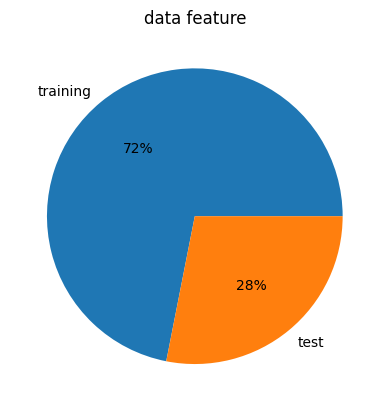

In [67]:
plt.pie(x = data2["data"].value_counts().reset_index()["data"],
        labels = data2["data"].value_counts().reset_index()["index"],
        autopct='%.0f%%')
plt.title("data feature")
plt.show()

* 72% Data is used for Training
* 28% Data is used for Test

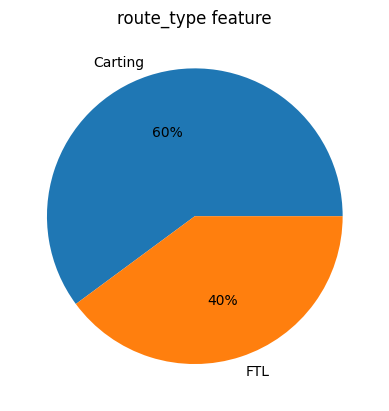

In [68]:
plt.pie(x = data2["route_type"].value_counts().reset_index()["route_type"],
        labels = data2["route_type"].value_counts().reset_index()["index"],
        autopct='%.0f%%')
plt.title("route_type feature")
plt.show()

* 60% Trips are of Cart type
* 40% Trips are of FTL type

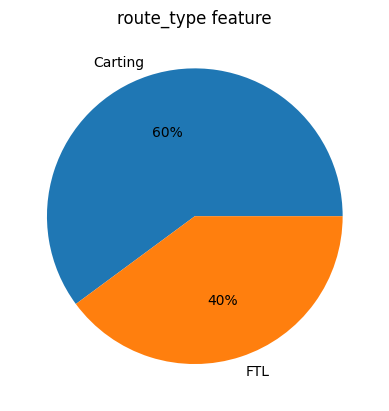

In [69]:
plt.pie(x = data2["route_type"].value_counts().reset_index()["route_type"],
        labels = data2["route_type"].value_counts().reset_index()["index"],
        autopct='%.0f%%')
plt.title("route_type feature")
plt.show()

<Axes: xlabel='trip_creation_hour', ylabel='count'>

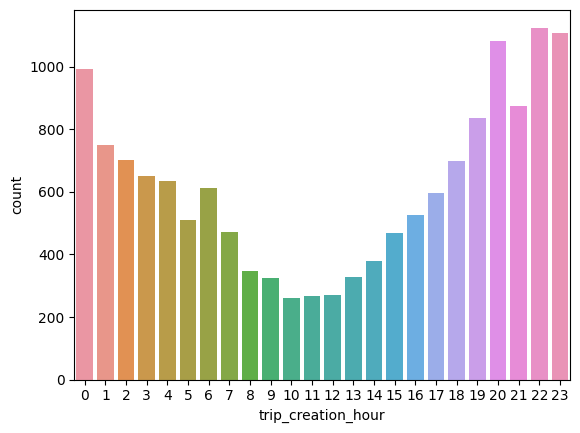

In [70]:
sns.countplot(data=data2, x= "trip_creation_hour")

* Trip creations are lowest in the Noon and Starts to increase and reaches peak in  midnight

<Axes: xlabel='trip_creation_day', ylabel='count'>

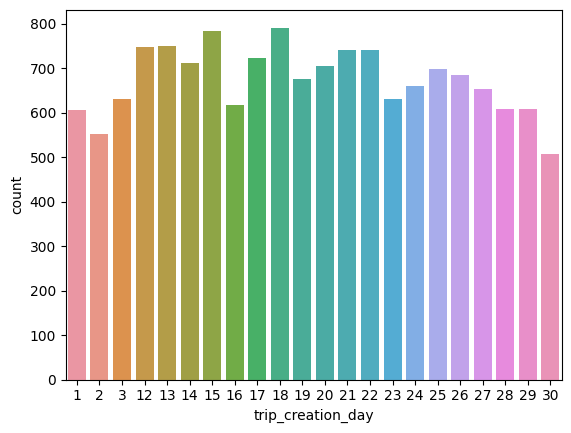

In [71]:
sns.countplot(data=data2, x= "trip_creation_day")

* More Number of Trip are created in the moiddle of the month and Number of trips are less at start and End of month

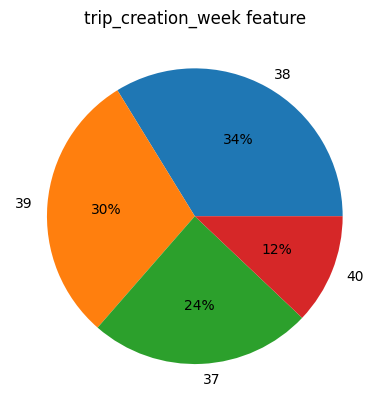

In [72]:
plt.pie(x = data2["trip_creation_week"].value_counts().reset_index()["trip_creation_week"],
        labels = data2["trip_creation_week"].value_counts().reset_index()["index"],
        autopct='%.0f%%')
plt.title("trip_creation_week feature")
plt.show()

* There is not much effect of Week ina month for trip Creation

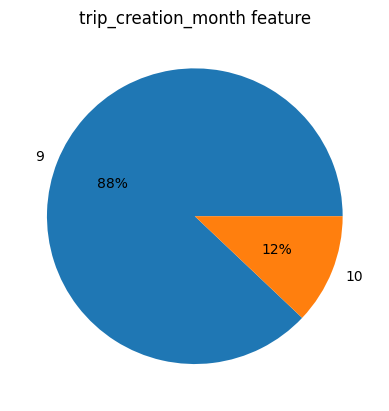

In [73]:
plt.pie(x = data2["trip_creation_month"].value_counts().reset_index()["trip_creation_month"],
        labels = data2["trip_creation_month"].value_counts().reset_index()["index"],
        autopct='%.0f%%')
plt.title("trip_creation_month feature")
plt.show()

Text(0.5, 1.0, 'Source_State Feature')

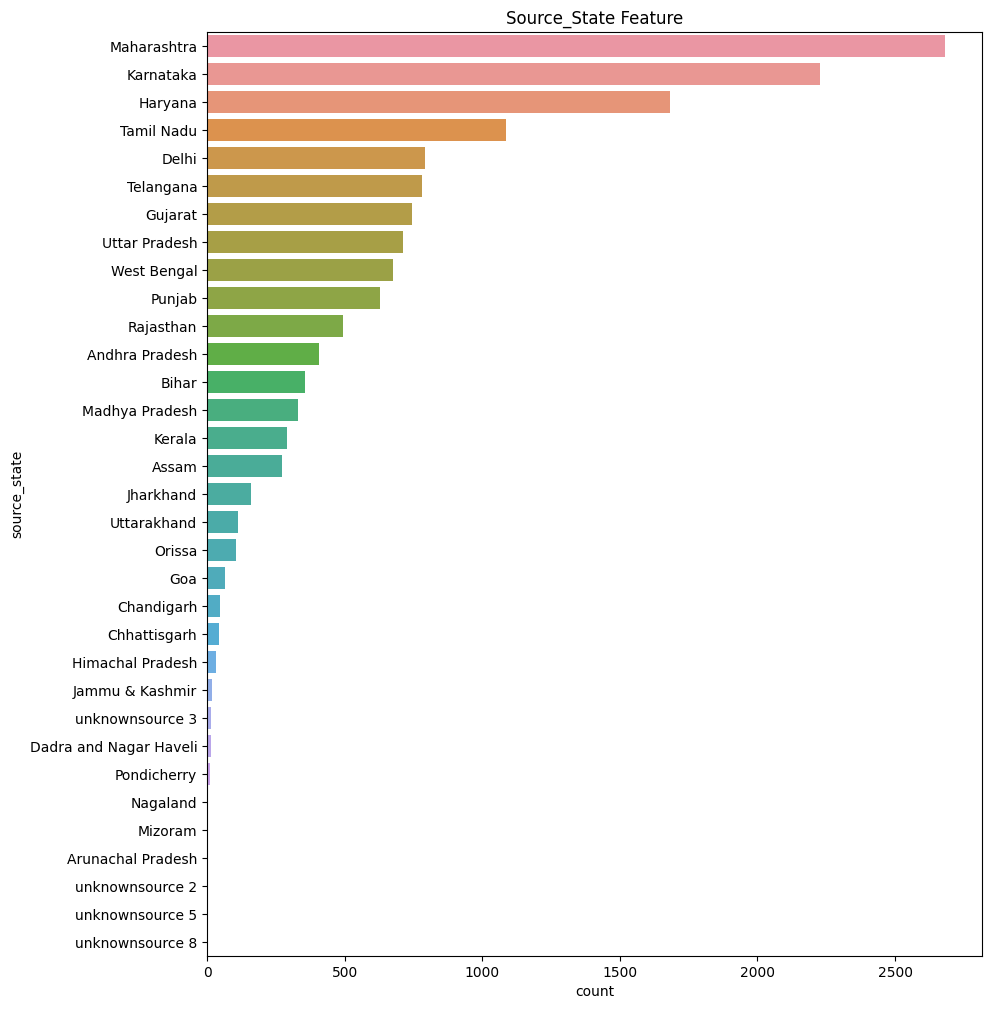

In [74]:
plt.figure(figsize =(10,12))
sns.countplot(data=data2, y= "source_state",order=data2['source_state'].value_counts().index)
plt.title("Source_State Feature")

Top5 Source States:
* Maharastra
* Karnataka
* Harayana
* Tamilnadu
* Delhi

Text(0.5, 1.0, 'destination_state Feature')

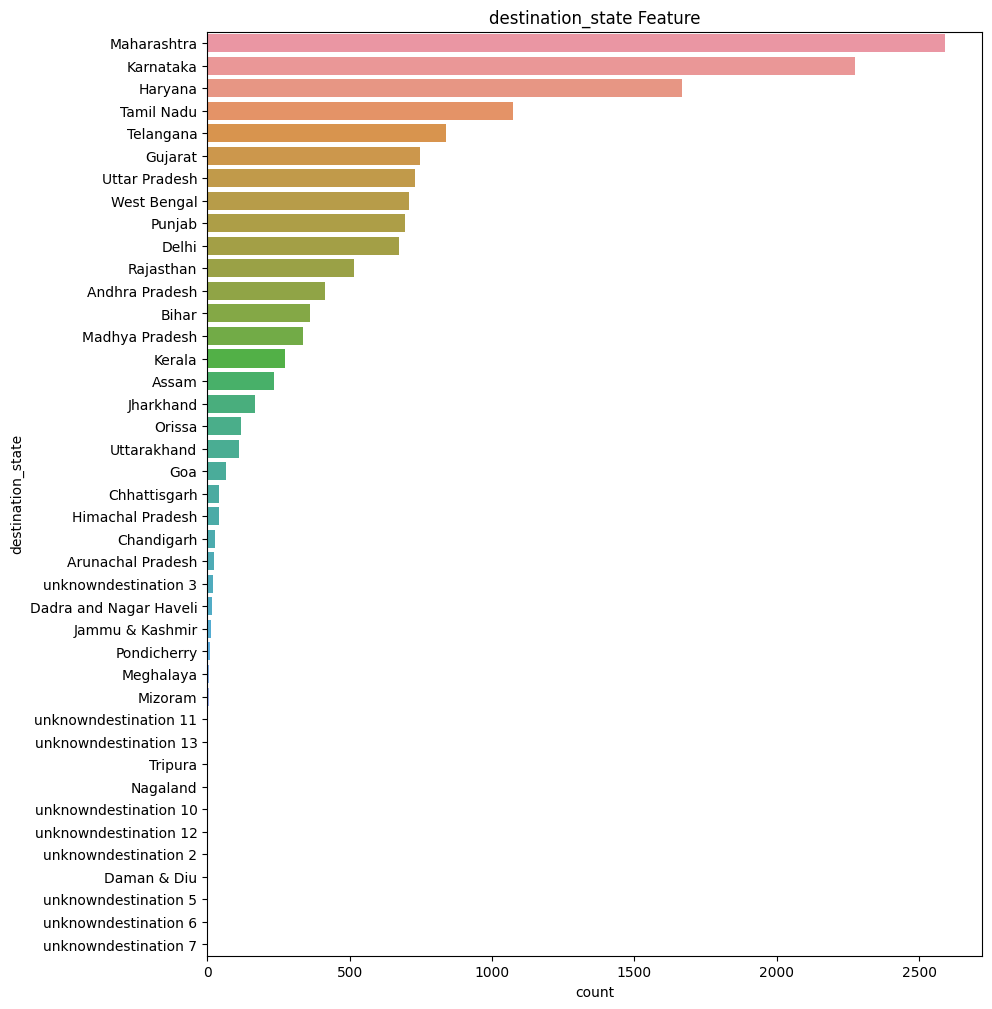

In [75]:
plt.figure(figsize =(10,12))
sns.countplot(data=data2, y= "destination_state",order=data2['destination_state'].value_counts().index)
plt.title("destination_state Feature")

Top5 destination States:
* Maharastra
* Karnataka
* Harayana
* Tamilnadu
* Telangana

Text(0.5, 1.0, 'source_city Feature')

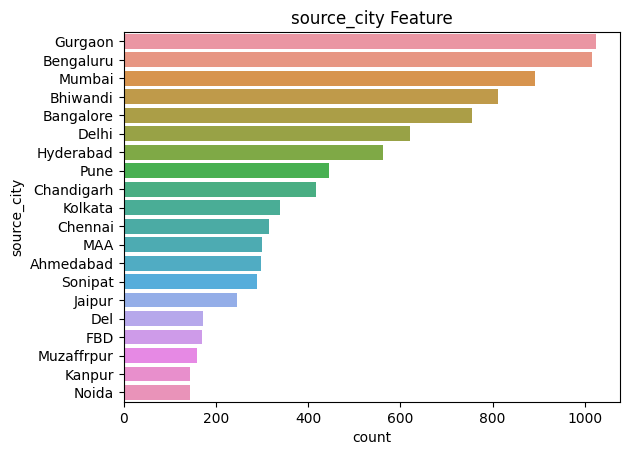

In [76]:
sns.countplot(data=data2, y= "source_city",order=data2['source_city'].value_counts().index[:20])
plt.title("source_city Feature")

Top5 Source Cities:
* Bengaluru
* Gurgoan
* Mumbai
* Bhiwandi
* Delhi

Text(0.5, 1.0, 'destination_city Feature')

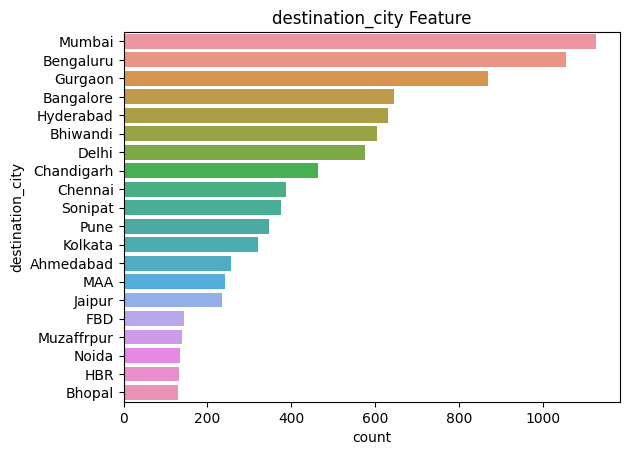

In [77]:
sns.countplot(data=data2, y= "destination_city",order=data2['destination_city'].value_counts().index[:20])
plt.title("destination_city Feature")

Top5 Destination Cities:
* Bengaluru
* Mumbai
* Gurgoan
* Hyderabad
* Bhiwandi

Text(0.5, 1.0, 'source_place Feature')

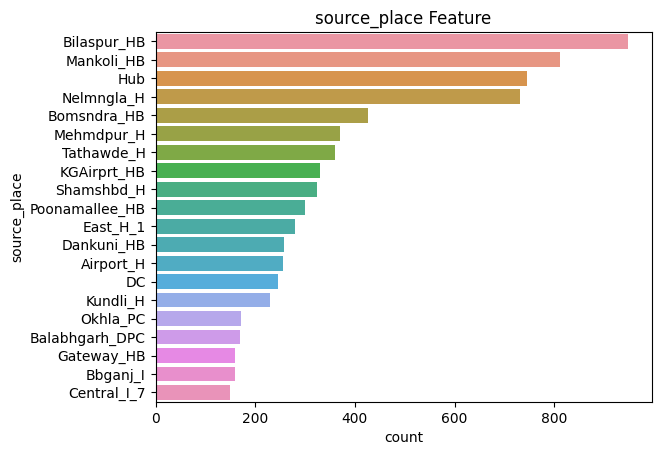

In [78]:
sns.countplot(data=data2, y= "source_place",order=data2['source_place'].value_counts().index[:20])
plt.title("source_place Feature")

Text(0.5, 1.0, 'destination_place Feature')

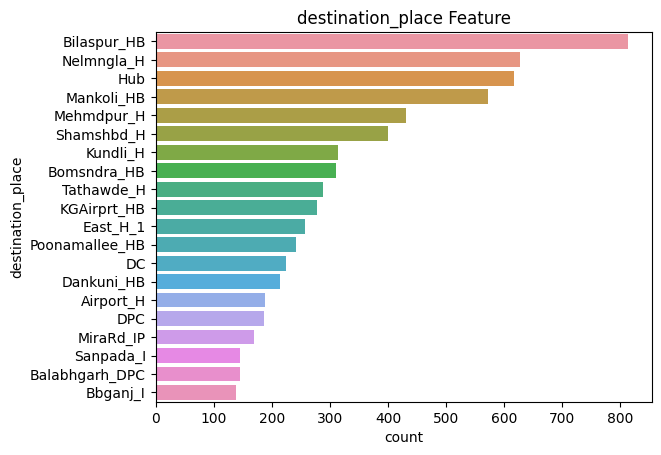

In [79]:
sns.countplot(data=data2, y= "destination_place",order=data2['destination_place'].value_counts().index[:20])
plt.title("destination_place Feature")

Text(0.5, 0, 'time')

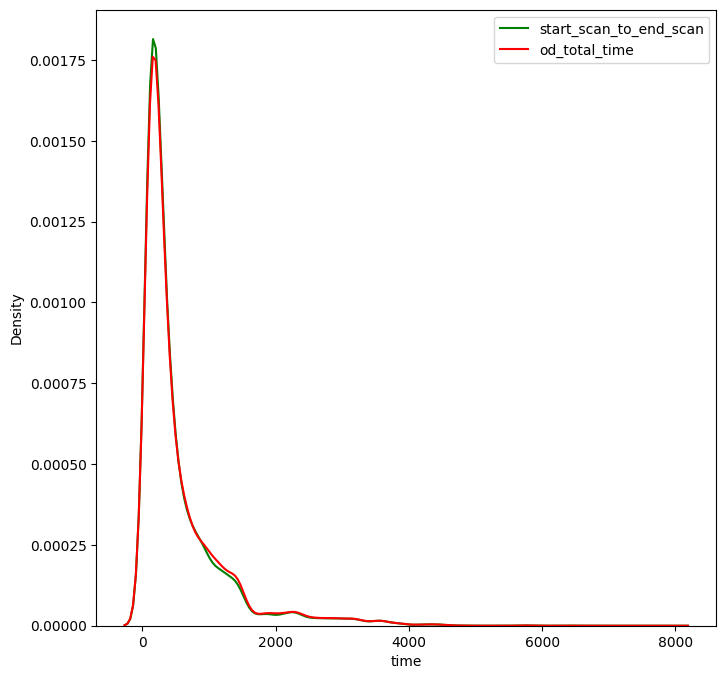

In [80]:
plt.figure(figsize =(8,8))
sns.kdeplot(data=data2,x = "start_scan_to_end_scan", color = "green")
sns.kdeplot(data=data2,x= "od_total_time",color = "red")
plt.legend(["start_scan_to_end_scan","od_total_time"])
plt.xlabel("time")

* od_total_time & start_scan_to_end_scan almost look like similar
* Further we will perform Hypothesis Testing to conclude

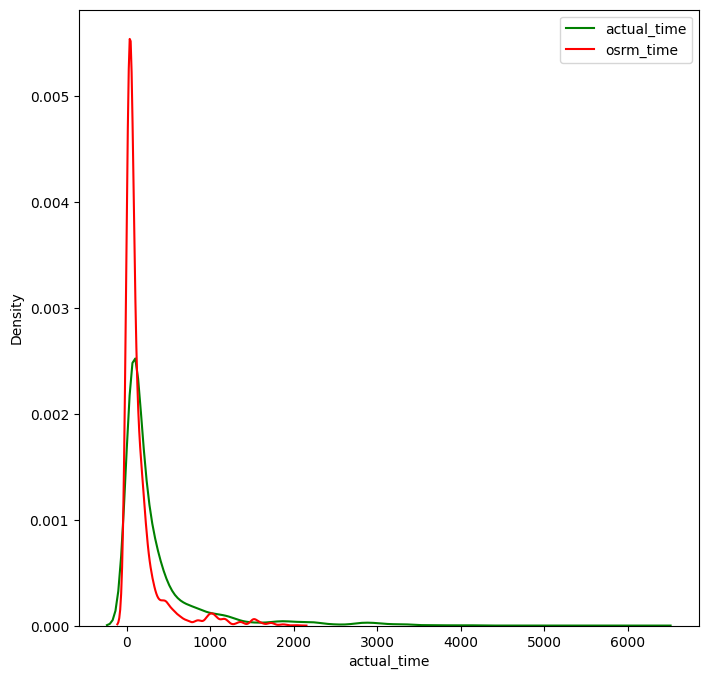

In [81]:
plt.figure(figsize =(8,8))
sns.kdeplot(data=data2,x = "actual_time",color="green")
sns.kdeplot(data=data2,x= "osrm_time",color = "red")
plt.legend(["actual_time","osrm_time"])

* Actual_time is seems to lower than osrm_time
* Further we will perform Hypothesis Testing to conclude

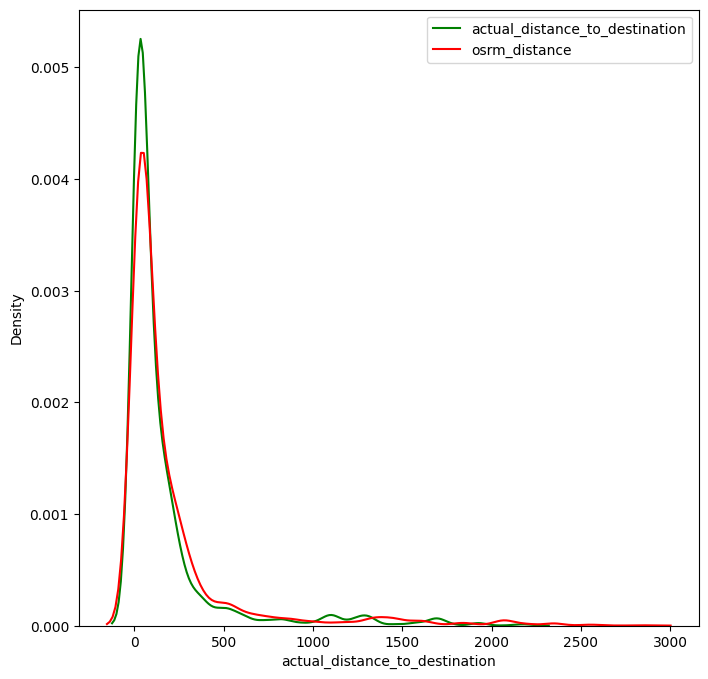

In [82]:
plt.figure(figsize =(8,8))
sns.kdeplot(data=data2,x = "actual_distance_to_destination",color ="green")
sns.kdeplot(data=data2,x= "osrm_distance",color = "red")
plt.legend(["actual_distance_to_destination","osrm_distance"])

* Actual_distance_to_destination seems to be  greater than osrm_distance
* Further we will perform Hypothesis Testing to conclude

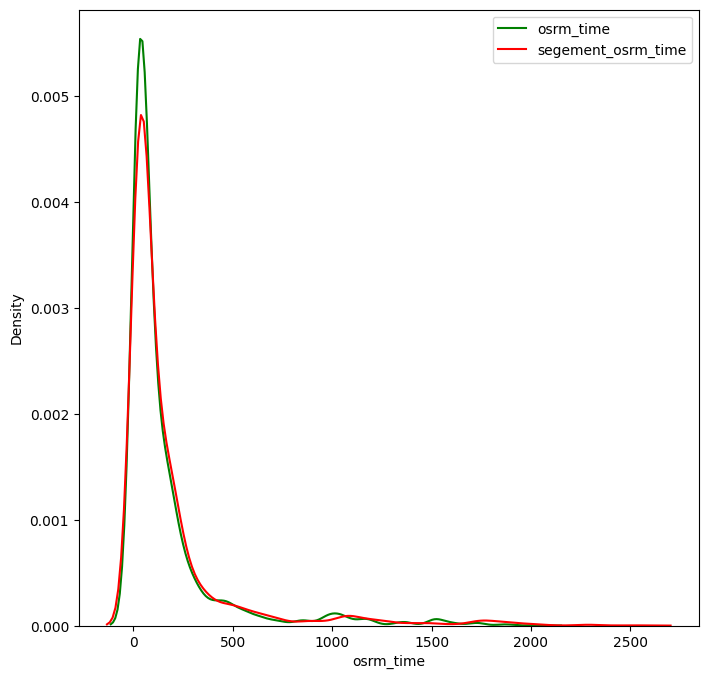

In [83]:
plt.figure(figsize =(8,8))
sns.kdeplot(data=data2,x = "osrm_time",color = "green")
sns.kdeplot(data=data2,x= "segment_osrm_time",color = "red")
plt.legend(["osrm_time","segement_osrm_time"])

* Total osrm_time seems to be  greater than segment_osrm_time
* Further we will perform Hypothesis Testing to conclude

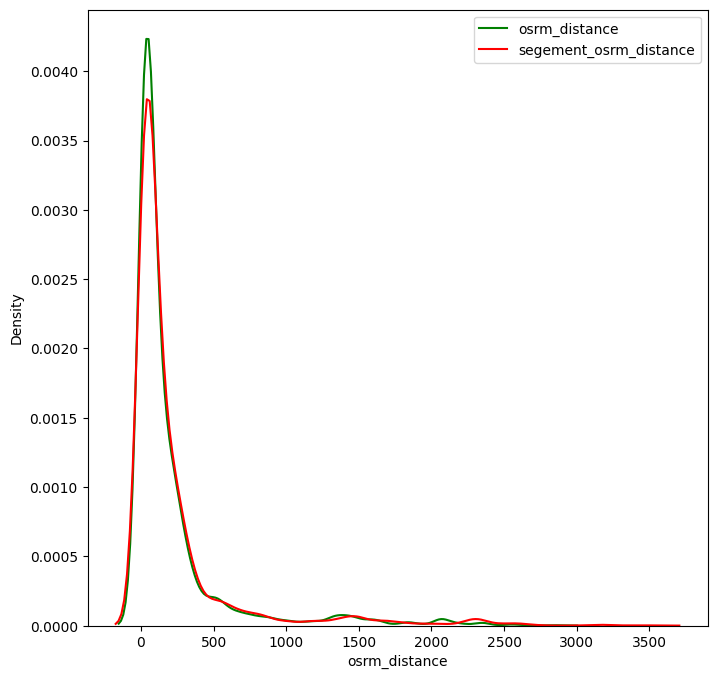

In [84]:
plt.figure(figsize =(8,8))
sns.kdeplot(data=data2,x = "osrm_distance",color = "green")
sns.kdeplot(data=data2,x= "segment_osrm_distance",color = "red")
plt.legend(["osrm_distance","segement_osrm_distance"])

* Total osrm_distance seems to be  greater than segment_osrm_distacne
* Further we will perform Hypothesis Testing to conclude

<ipython-input-85-9214ab8145cd>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(data2.corr(),annot=True)


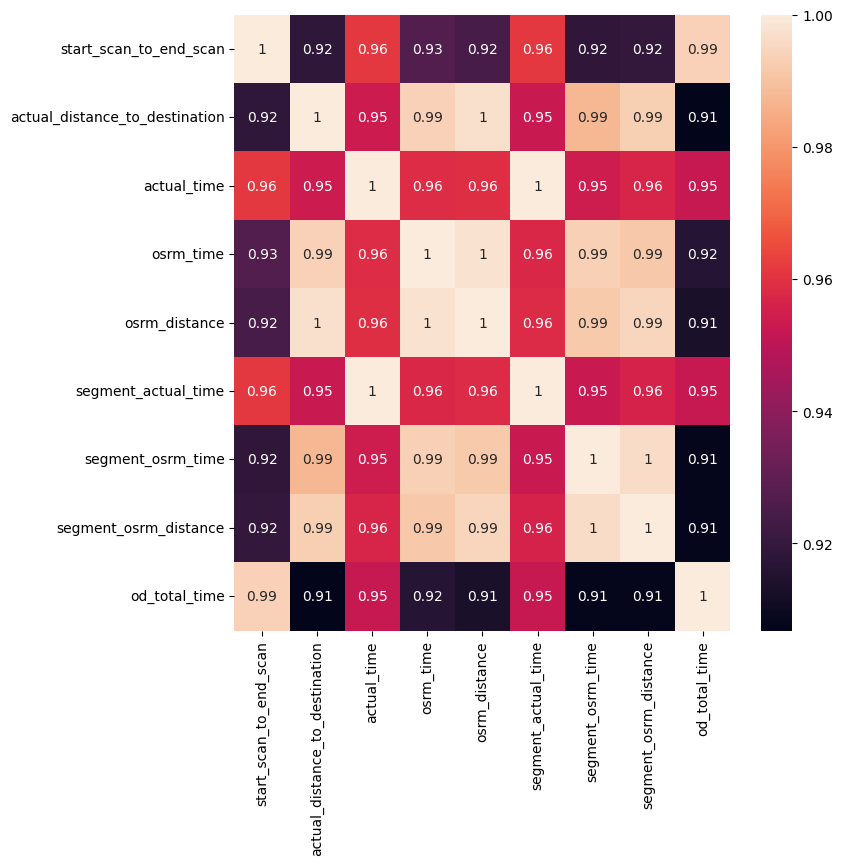

In [85]:
plt.figure(figsize =(8,8))
sns.heatmap(data2.corr(),annot=True)
plt.show()

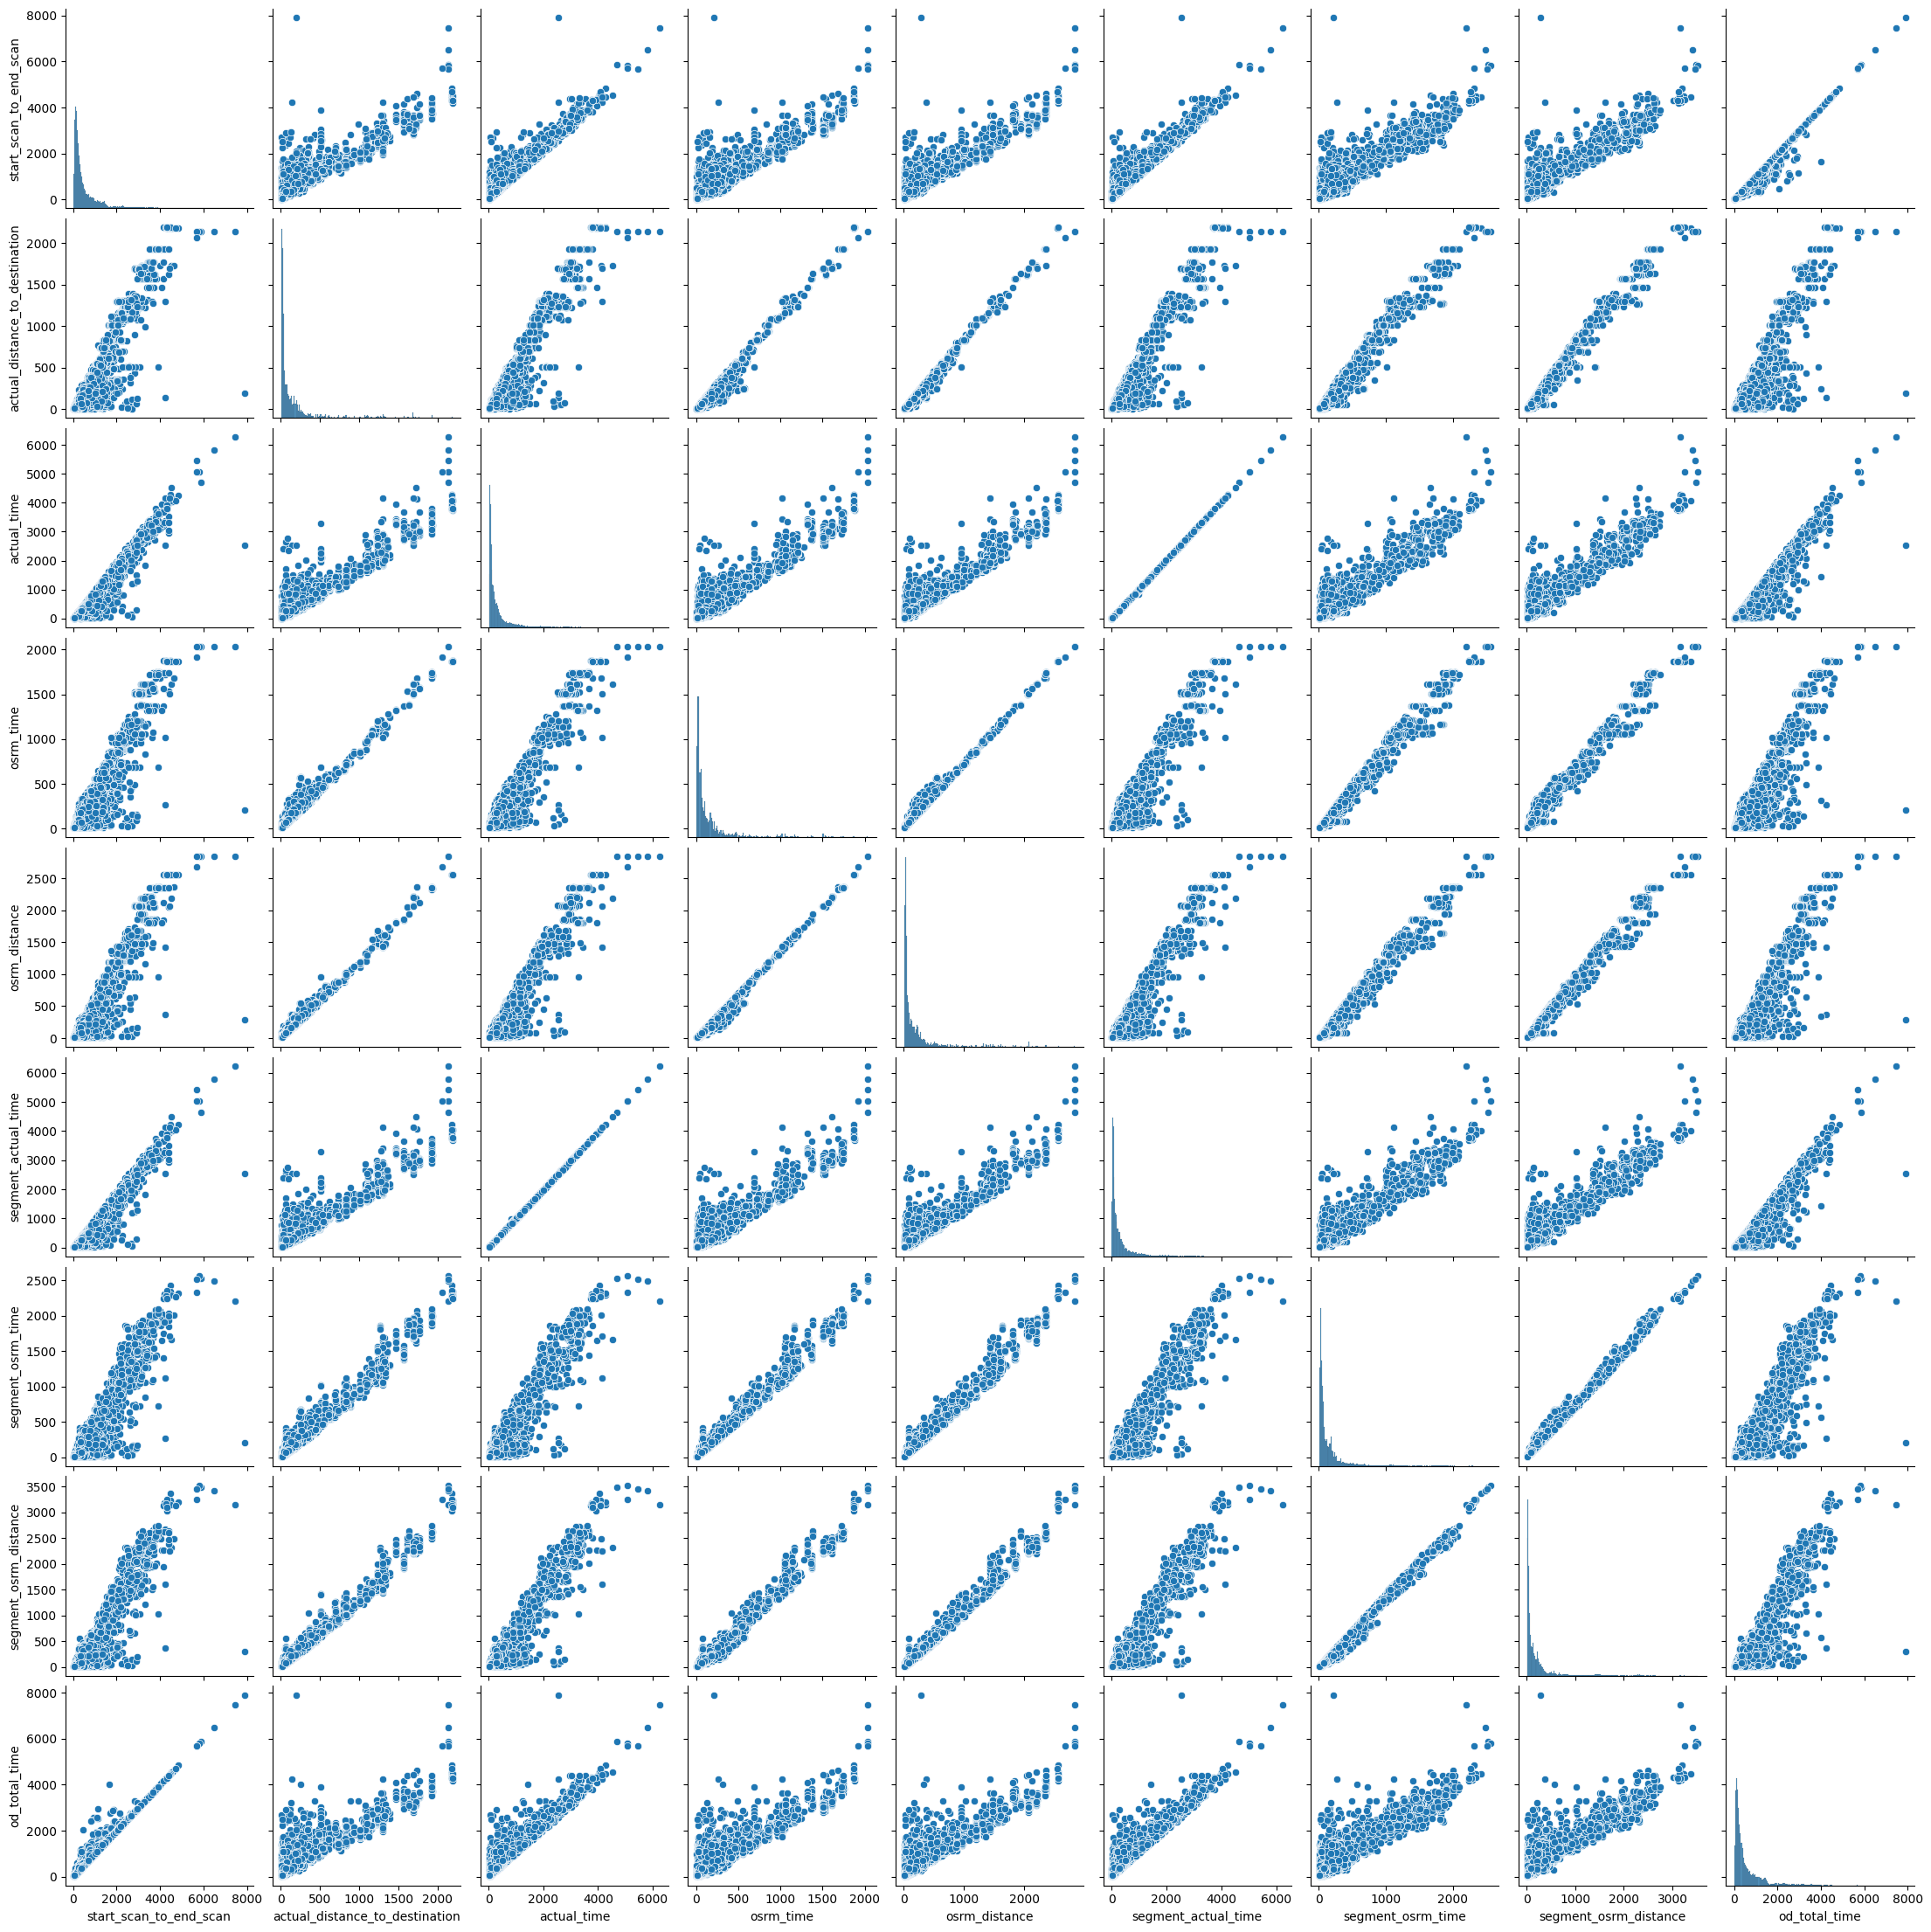

In [86]:
sns.pairplot(data=data2)

* All Time & Distance Feature are very highly correlated

# **Finding & Treating Outliers Using IQR**

In [87]:
numericalfeatures = ["start_scan_to_end_scan","od_total_time","actual_distance_to_destination","actual_time","segment_actual_time", "osrm_time",
 "osrm_distance","segment_osrm_time","segment_osrm_distance"]

## IQR Analysis and Outlier Finding

* We will create a new Dataframe " outlier" which store Boolean value of IQR Analysis Result for each reading of all numerical feature columns

In [88]:
# Finding outlier for all Numerical features
outlier = pd.DataFrame() # creating as new dataframe to store outliers for each numerical feature
for z in numericalfeatures:
    print(z,"Feature")
    print("*******************************************************************")
    IQR = np.percentile(data2[z],75) - np.percentile(data2[z],25)
    lower_limit = max (np.percentile(data2[z],25) - 1.5*IQR,0)
    upper_limit = np.percentile(data2[z],75) + 1.5*IQR
    outlier[z] = (data2[z]>upper_limit) | (data2[z]<lower_limit)

    print("Minimum -->",data2[z].min())
    print("Lower Limit -->",lower_limit)
    print("Quantile25 -->",np.percentile(data2[z],25))
    print("Median -->",np.percentile(data2[z],50))
    print("Quantile75 -->",np.percentile(data2[z],75))
    print("Upper Limit -->",upper_limit)
    print("Maximum -->",data2[z].max())

    print()
    print("Out of ",len(data2[z]), "Data points , There are",outlier[z].sum(),"Outliers")
    print()
    print("*******************************************************************")

start_scan_to_end_scan Feature
*******************************************************************
Minimum --> 23.0
Lower Limit --> 0
Quantile25 --> 149.0
Median --> 280.0
Quantile75 --> 637.0
Upper Limit --> 1369.0
Maximum --> 7898.0

Out of  14817 Data points , There are 1267 Outliers

*******************************************************************
od_total_time Feature
*******************************************************************
Minimum --> 23.461468483333334
Lower Limit --> 0
Quantile25 --> 151.15848843333333
Median --> 288.5703387
Quantile75 --> 673.3013645
Upper Limit --> 1456.5156785999998
Maximum --> 7898.551954566667

Out of  14817 Data points , There are 1115 Outliers

*******************************************************************
actual_distance_to_destination Feature
*******************************************************************
Minimum --> 9.00246144174878
Lower Limit --> 0
Quantile25 --> 22.83723905859321
Median --> 48.47407210275264
Quantile75 --> 16

## Box-Plot for Outlier Visualization

* Let us visualize the outliers with Box plot

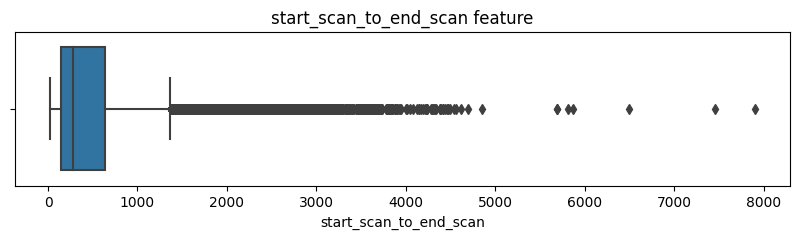

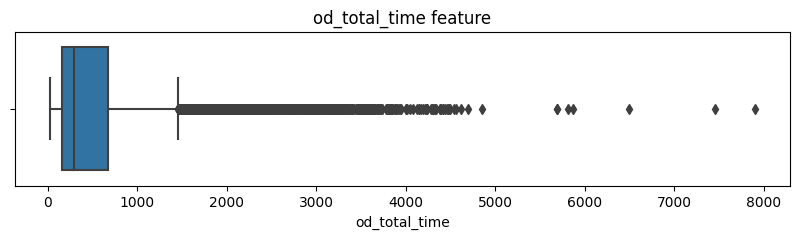

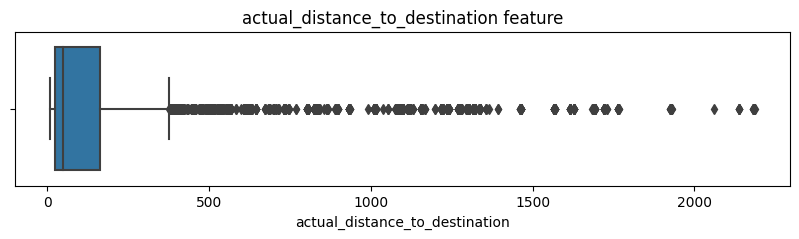

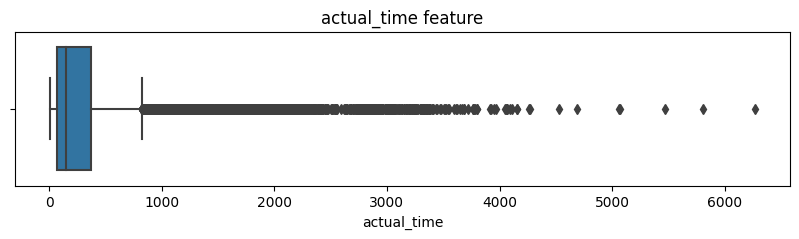

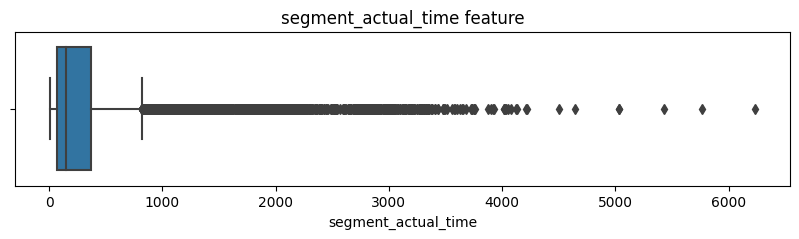

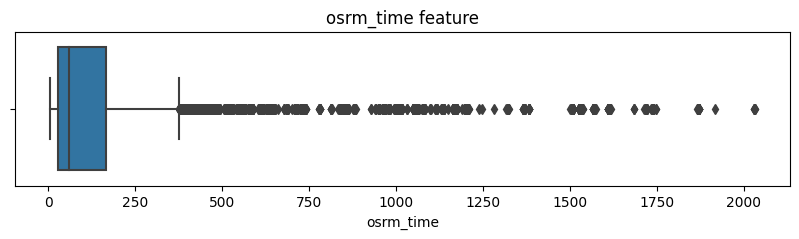

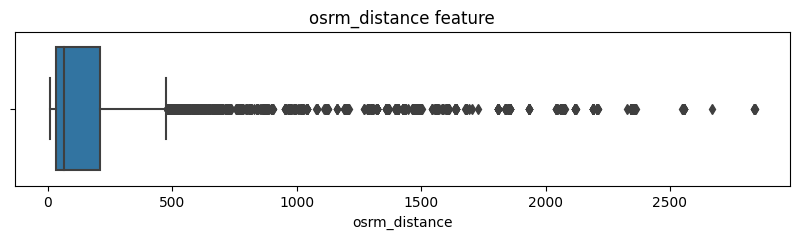

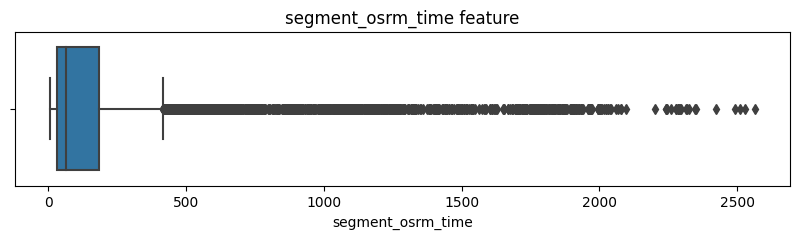

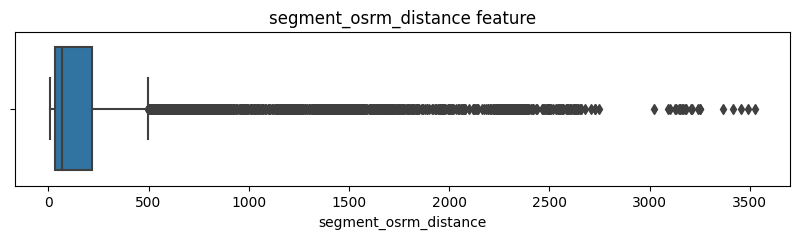

In [90]:
for z in numericalfeatures:
  plt.figure(figsize=(10,2))
  sns.boxplot(data= data2, x = z)
  plt.title(z+" feature")

## Outlier Treatment

* let us check if outliers are really outliers or they are occuring due to long distance/ Duration Couriers

In [91]:
outlier.shape

(14817, 9)

In [92]:
outlier["count"] = outlier.sum(axis=1)

In [93]:
# Checking for rows which have come as outliers in all 9 numerical columns
outlier[outlier["count"]==9].count()

start_scan_to_end_scan            943
od_total_time                     943
actual_distance_to_destination    943
actual_time                       943
segment_actual_time               943
osrm_time                         943
osrm_distance                     943
segment_osrm_time                 943
segment_osrm_distance             943
count                             943
dtype: int64

In [94]:
# Checking for rows which have come as outliers in all 9 numerical columns
data2.iloc[outlier[outlier["count"]==9].index]

,trip_uuid,data,route_schedule_uuid,route_type,trip_creation_time,source_name,source_center,destination_name,destination_center,start_scan_to_end_scan,...,trip_creation_day,trip_creation_week,trip_creation_month,trip_creation_year,source_state,source_city,source_place,destination_state,destination_city,destination_place
0,trip-153671041653548748,training,thanos::sroute:d7c989ba-a29b-4a0b-b2f4-288cdc6...,FTL,2018-09-12 00:00:16.535741,Bhopal_Trnsport_H (Madhya Pradesh),IND462022AAA,Gurgaon_Bilaspur_HB (Haryana),IND000000ACB,2259.0,...,12,37,9,2018,Madhya Pradesh,Bhopal,Trnsport_H,Haryana,Gurgaon,Bilaspur_HB
2,trip-153671043369099517,training,thanos::sroute:de5e208e-7641-45e6-8100-4d9fb1e...,FTL,2018-09-12 00:00:33.691250,Bangalore_Nelmngla_H (Karnataka),IND562132AAA,Chandigarh_Mehmdpur_H (Punjab),IND160002AAC,3933.0,...,12,37,9,2018,Karnataka,Bangalore,Nelmngla_H,Punjab,Chandigarh,Mehmdpur_H
41,trip-153671321710455800,training,thanos::sroute:951d77aa-4725-4c4e-882d-42acc35...,FTL,2018-09-12 00:46:57.104787,Bhiwandi_Mankoli_HB (Maharashtra),IND421302AAG,Gurgaon_Bilaspur_HB (Haryana),IND000000ACB,2338.0,...,12,37,9,2018,Maharashtra,Bhiwandi,Mankoli_HB,Haryana,Gurgaon,Bilaspur_HB
43,trip-153671328307356992,training,thanos::sroute:64d4c6c9-ffb9-4794-b9f1-05f064c...,FTL,2018-09-12 00:48:03.073766,Delhi_Airport_H (Delhi),IND110037AAM,Bhiwandi_Mankoli_HB (Maharashtra),IND421302AAG,2302.0,...,12,37,9,2018,Delhi,Delhi,Airport_H,Maharashtra,Bhiwandi,Mankoli_HB
62,trip-153671547254076660,training,thanos::sroute:2a713f58-e06f-4251-a6f0-f374373...,FTL,2018-09-12 01:24:32.541032,Hyderabad_Shamshbd_H (Telangana),IND501359AAE,Hyderabad_Shamshbd_H (Telangana),IND501359AAE,1792.0,...,12,37,9,2018,Telangana,Hyderabad,Shamshbd_H,Telangana,Hyderabad,Shamshbd_H
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14701,trip-153860352246282031,test,thanos::sroute:be1c03eb-fd2f-4455-a933-5e3d085...,FTL,2018-10-03 21:52:02.463089,Gurgaon_Bilaspur_HB (Haryana),IND000000ACB,Kolkata_Dankuni_HB (West Bengal),IND712311AAA,2114.0,...,3,40,10,2018,Haryana,Gurgaon,Bilaspur_HB,West Bengal,Kolkata,Dankuni_HB
14730,trip-153860570045461434,test,thanos::sroute:870bead8-6c8a-458f-b4d8-658de44...,FTL,2018-10-03 22:28:20.454881,Gurgaon_Bilaspur_HB (Haryana),IND000000ACB,Ranchi_Hub (Jharkhand),IND834002AAB,2051.0,...,3,40,10,2018,Haryana,Gurgaon,Bilaspur_HB,Jharkhand,Ranchi,Hub
14750,trip-153860698042160875,test,thanos::sroute:67c77992-49e3-4594-9a75-9861ef0...,FTL,2018-10-03 22:49:40.421862,Bhiwandi_Mankoli_HB (Maharashtra),IND421302AAG,Chandigarh_Mehmdpur_H (Punjab),IND160002AAC,2660.0,...,3,40,10,2018,Maharashtra,Bhiwandi,Mankoli_HB,Punjab,Chandigarh,Mehmdpur_H
14769,trip-153860879439383883,test,thanos::sroute:105d3425-e2d7-4f05-ad0c-157dc94...,FTL,2018-10-03 23:19:54.394130,Bangalore_Nelmngla_H (Karnataka),IND562132AAA,Chandigarh_Mehmdpur_H (Punjab),IND160002AAC,4410.0,...,3,40,10,2018,Karnataka,Bangalore,Nelmngla_H,Punjab,Chandigarh,Mehmdpur_H


* There are total 943 Rows which have come as outlier in all 9 numerical features
* **But we cannot delete the rows just because of the IQR rule, these outliers might be trips which are having very long distance & duration**
* So all t**hese outliers can be good Data points** only
* so we cannot drop these outliers data point
* we will use them as OK


# **Hypothesis Testing**

* In this Data Differet test [Num-Num,Cat-Num,Cat-Cat] can be done
* But our objective to increase the end user experince by correctly predicting Duration of Delivery & for optimizing Logistics by correctly predicting distance w.r.t OSRM Distance & Duration
* Also we have to optimize Each Segment wise for each trip
* so we will do Hypothesis testing for below combinations
** od_total_time and start_scan_to_end_scan
** actual_time and osrm_time
** actual_time and segment_actual_time
** osrm_distance and segment_osrm_distance
** osrm_time and segment_osrm_time
** actual_distance_to_destination and osrm_distance





## Hypothesis Testing Set up

In this section let us fix the Confidence level & Level of Signification for all our Hypothesis testing.

As this is with respect to predicting demand Situation
* let us Assume **we want 95% Confidence to reject Null Hypothesi**s
* so for every Hypothesis testing, **Level of Significane will be "0.05 "**

As we have 2 Nos of Cat-Num, we will use 2 Sample T-Test or its equivalent
* Ho --> Both Categories have same Mean
* Ha --> Both Categories have different mean

Before using T-test , we will c**heck for assumptions if both Data sample means are following Normal Distribution? & does they have equal variance**?

* For **Sample means should follow Normal Distribution**, we will use Shapiro test with below Hypothesis Condition
** H0 : Data is Gaussian
** Ha : Data is not Gaussian

* For **Equal Variances** Check, we will use Levene Test with below Hypothesis condition
** H0: Variances are equal
** Ha: Variances are not equal




## od_total_time and start_scan_to_end_scan

In [95]:
subset = ["od_total_time","start_scan_to_end_scan"]

In [96]:
subsetsamplemean = [[np.mean(data2[i].sample(500)) for k in range(5000)] for i in subset]

* let's check for Normal Distribution of both Data sets Sample Mean

In [97]:
# H0 : Data is Gaussian
# Ha : Data is not Gaussian
for i in range(2):
  test_stat, p_value = shapiro(subsetsamplemean[i])
  print(p_value)
  if p_value < 0.05:
       print("Reject H0")
       print(subset[i],"Data is Not Gaussian")
  else:
       print("Fail to reject H0")
       print(subset[i],"Data is Gaussian")
  print()

1.3234453945187852e-05
Reject H0
od_total_time Data is Not Gaussian

0.006467732600867748
Reject H0
start_scan_to_end_scan Data is Not Gaussian



* Let us plot Histplot to check how data actually looks

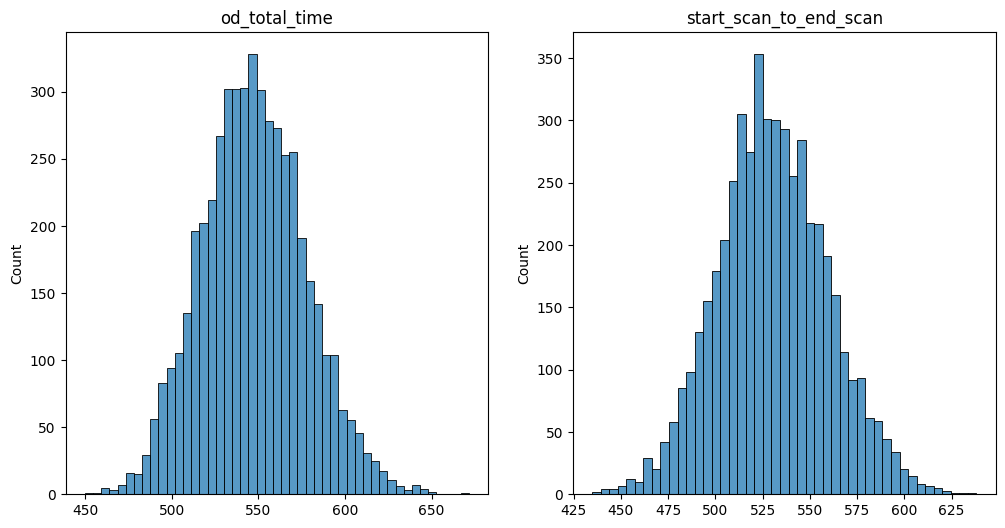

In [98]:
plt.figure(figsize = (12,6))
for i in range(2):
  plt.subplot(1,2,i+1)
  sns.histplot(subsetsamplemean[i])
  plt.title(subset[i])
plt.show()

* Even the Histogram shows that they are not following Normal Distribution
* Let's do QQ Plot also

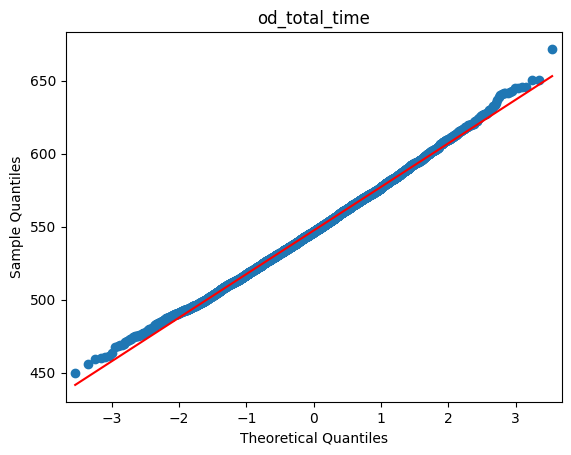

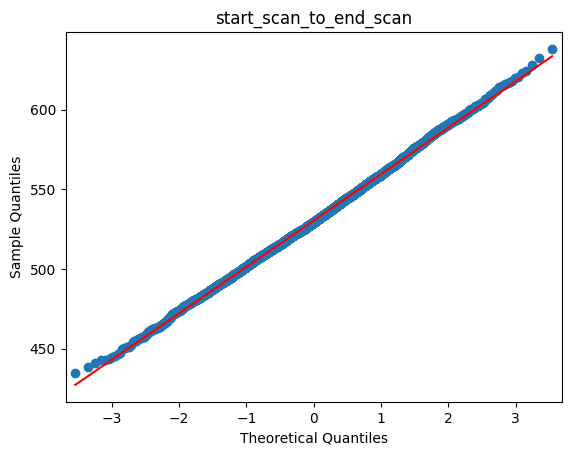

In [99]:
for i in range(2):
   qqplot( np.array(subsetsamplemean[i]) , line="s")
   plt.title(subset[i])
   plt.show()

* From Shapiro, Histogram & QQ plot--> we can conclude that both data sets sample means are not following Normal Distribution, slightly deviated
* Now we will do Levene test to check for equal Variances of datasets

In [100]:
# Ho: Variances are equal
# Ha: Variances are not equal
levene_stat, p_value = levene(data2[subset[0]],data2[subset[1]])
print(p_value)
if p_value < 0.05:
    print("Reject Ho")
    print("Variances are not equal")
else:
    print("Fail to reject Ho")
    print("Variances are equal")

0.04528721781238512
Reject Ho
Variances are not equal


* Both Datasets do not have equal Variance
* T-Test Independent is valid on the assumptions that 1. Sample means of 2 data sets follow Normal Distribution & Datasets Have Equal Variances
* But both of them are not valid
* so we will **Non-Paramteric Independent sample T-test**

In [101]:
# subset = ["od_total_time","start_scan_to_end_scan"]

#H0: mu1 <= mu2
#Ha : mu1 > mu2

kruskal_stat, p_value= mannwhitneyu(data2[subset[0]],data2[subset[1]],alternative = "greater")
print(p_value)
if p_value < 0.05:
    print("Reject H0")
    print("One or more groups have different mean")
else:
    print("Fail to reject H0")
    print("All groups have same mean")

0.010834055922721585
Reject H0
One or more groups have different mean


* From Hypothesis Testing we can conclude that, **"od_total_time" is greater than "start_scan_to_end_scan" for a given trip_uuid**

## actual_time and osrm_time

In [102]:
subset = ["actual_time","osrm_time"]

In [103]:
subsetsamplemean = [[np.mean(data2[i].sample(500)) for k in range(5000)] for i in subset]

* let's check for Normal Distribution of both Data sets Sample Mean

In [104]:
# H0 : Data is Gaussian
# Ha : Data is not Gaussian
for i in range(2):
  test_stat, p_value = shapiro(subsetsamplemean[i])
  print(p_value)
  if p_value < 0.05:
       print("Reject H0")
       print(subset[i],"Data is Not Gaussian")
  else:
       print("Fail to reject H0")
       print(subset[i],"Data is Gaussian")
  print()

1.142875362347695e-06
Reject H0
actual_time Data is Not Gaussian

3.08930866594892e-05
Reject H0
osrm_time Data is Not Gaussian



* Let us plot Histplot to check how data actually looks

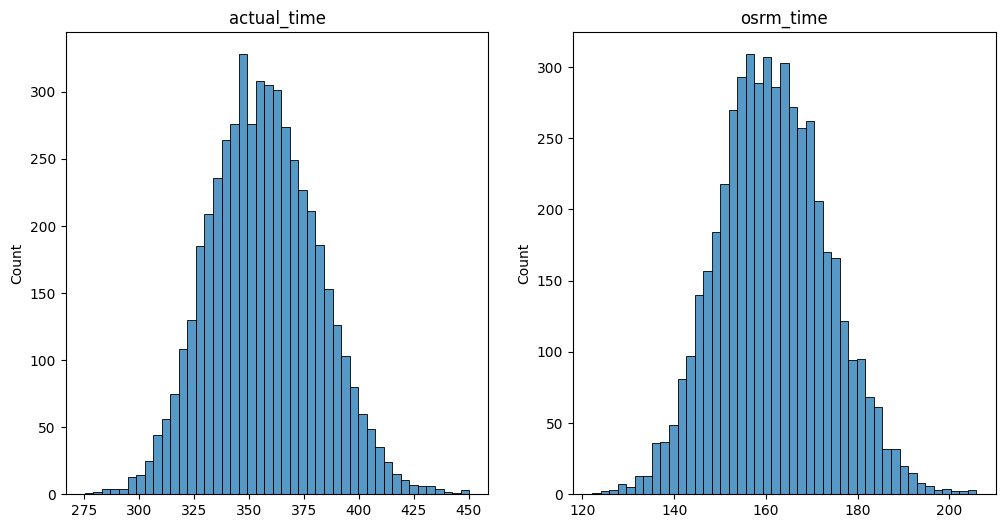

In [105]:
plt.figure(figsize = (12,6))
for i in range(2):
  plt.subplot(1,2,i+1)
  sns.histplot(subsetsamplemean[i])
  plt.title(subset[i])
plt.show()

* Even the Histogram shows that they are not following Normal Distribution
* Let's do QQ Plot also

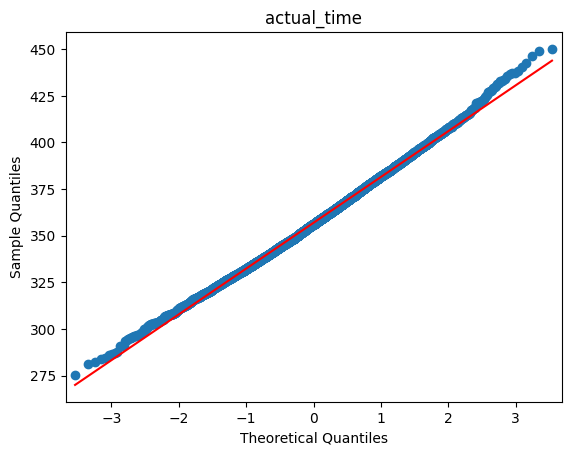

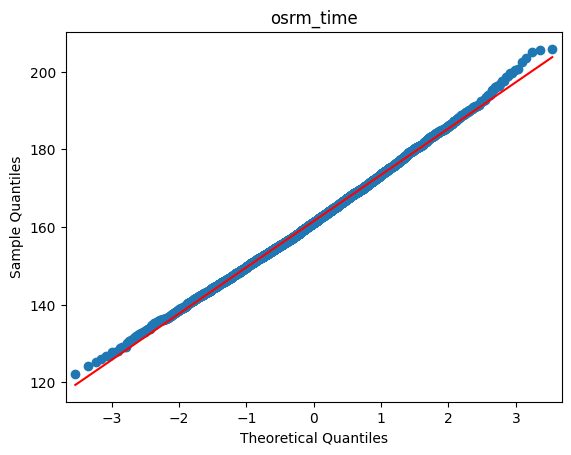

In [106]:
for i in range(2):
   qqplot( np.array(subsetsamplemean[i]) , line="s")
   plt.title(subset[i])
   plt.show()

* From Shapiro, Histogram & QQ plot--> we can conclude that both data sets sample means are not following Normal Distribution, slightly deviated
* Now we will do Levene test to check for equal Variances of datasets

In [107]:
# Ho: Variances are equal
# Ha: Variances are not equal
levene_stat, p_value = levene(data2[subset[0]],data2[subset[1]])
print(p_value)
if p_value < 0.05:
    print("Reject Ho")
    print("Variances are not equal")
else:
    print("Fail to reject Ho")
    print("Variances are equal")

1.871297993683208e-220
Reject Ho
Variances are not equal


* Both Datasets do not have equal Variance
* T-Test Independent is valid on the assumptions that 1. Sample means of 2 data sets follow Normal Distribution & Datasets Have Equal Variances
* But both of them are not valid
* so we will **Non-Paramteric Independent sample T-test**

In [108]:
# subset = ["actual_time","osrm_time"]

#H0: mu1 <= mu2
#Ha : mu1 > mu2

kruskal_stat, p_value= mannwhitneyu(data2[subset[0]],data2[subset[1]],alternative = "greater")
print(p_value)
if p_value < 0.05:
    print("Reject H0")
    print("One or more groups have different mean")
else:
    print("Fail to reject H0")
    print("All groups have same mean")

0.0
Reject H0
One or more groups have different mean


* From Hypothesis Testing we can conclude that, **"actual_time" is always greater than "osrm_time" for a given trip_uuid**

## actual_time  and segment_actual_time

In [109]:
subset = ["actual_time","segment_actual_time"]

In [110]:
subsetsamplemean = [[np.mean(data2[i].sample(500)) for k in range(5000)] for i in subset]

* let's check for Normal Distribution of both Data set's Sample mean

In [111]:
# H0 : Data is Gaussian
# Ha : Data is not Gaussian
for i in range(2):
  test_stat, p_value = shapiro(subsetsamplemean[i])
  print(p_value)
  if p_value < 0.05:
       print("Reject H0")
       print(subset[i],"Data is Not Gaussian")
  else:
       print("Fail to reject H0")
       print(subset[i],"Data is Gaussian")
  print()

4.538553000088541e-08
Reject H0
actual_time Data is Not Gaussian

0.0002473114291206002
Reject H0
segment_actual_time Data is Not Gaussian



* Let us plot Histplot to check how data actually looks

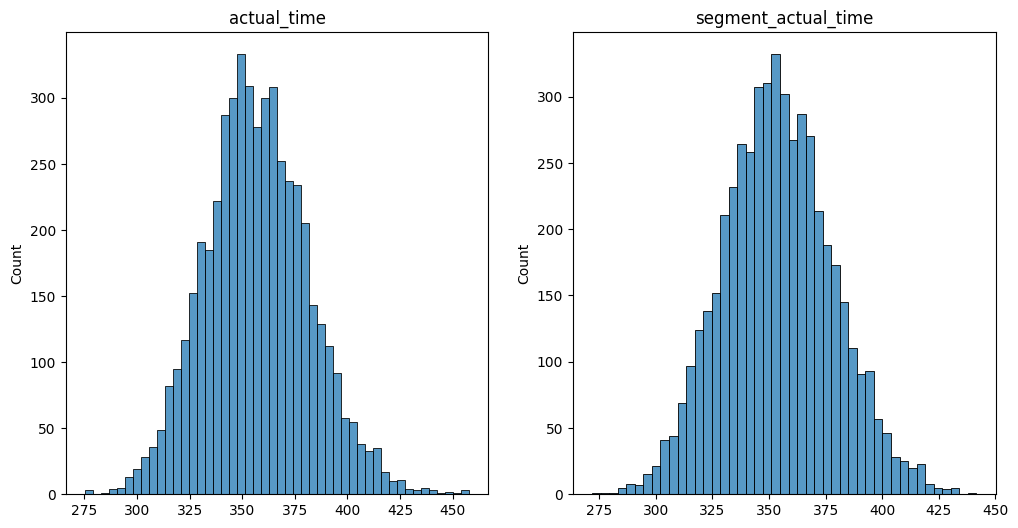

In [112]:
plt.figure(figsize = (12,6))
for i in range(2):
  plt.subplot(1,2,i+1)
  sns.histplot(subsetsamplemean[i])
  plt.title(subset[i])
plt.show()

* Even the Histogram shows that they are not following Normal Distribution
* Let's do QQ Plot also

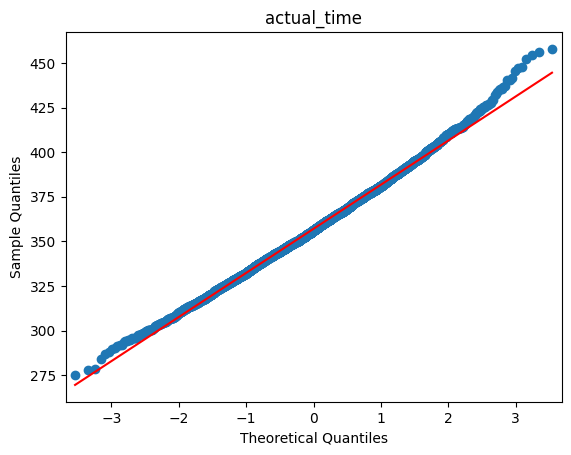

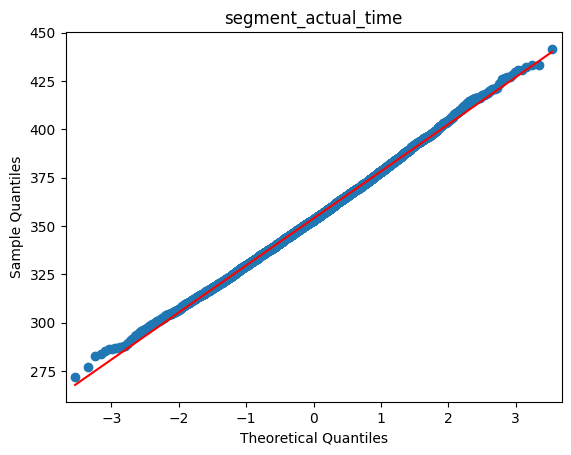

In [113]:
for i in range(2):
   qqplot( np.array(subsetsamplemean[i]) , line="s")
   plt.title(subset[i])
   plt.show()

* From Shapiro, Histogram & QQ plot--> we can conclude that both data sets sample means are not following Normal Distribution, slightly deviated
* Now we will do Levene test to check for equal Variances of datasets

In [114]:
# Ho: Variances are equal
# Ha: Variances are not equal
levene_stat, p_value = levene(data2[subset[0]],data2[subset[1]])
print(p_value)
if p_value < 0.05:
    print("Reject Ho")
    print("Variances are not equal")
else:
    print("Fail to reject Ho")
    print("Variances are equal")

0.6955022668700895
Fail to reject Ho
Variances are equal


* Both Datasets do not have equal Variance
* T-Test Independent is valid on the assumptions that 1. Sample means of 2 data sets follow Normal Distribution & Datasets Have Equal Variances
* But only Equal Variance Assumption is satisfying
* so we will **Non-Paramteric Independent sample T-test**

In [115]:
# subset = ["actual_time","segment_actual_time"]

# H0: mu1 = mu2
#Ha: mu1 != mu2

kruskal_stat, p_value= mannwhitneyu(data2[subset[0]],data2[subset[1]])
print(p_value)
if p_value < 0.05:
    print("Reject H0")
    print("One or more groups have different mean")
else:
    print("Fail to reject H0")
    print("All groups have same mean")

0.4164235159622476
Fail to reject H0
All groups have same mean


* From Hypothesis Testing we can conclude that, **"actual_time" & "segment_actual_time" have approx same mean for a given trip_uuid **

## osrm_distance and segment_osrm_distance

In [116]:
subset = ["osrm_distance","segment_osrm_distance"]

In [117]:
subsetsamplemean = [[np.mean(data2[i].sample(500)) for k in range(5000)] for i in subset]

* let's check for Normal Distribution of both Data sets Mean

In [118]:
# H0 : Data is Gaussian
# Ha : Data is not Gaussian
for i in range(2):
  test_stat, p_value = shapiro(subsetsamplemean[i])
  print(p_value)
  if p_value < 0.05:
       print("Reject H0")
       print(subset[i],"Data is Not Gaussian")
  else:
       print("Fail to reject H0")
       print(subset[i],"Data is Gaussian")
  print()

3.2689862564438954e-05
Reject H0
osrm_distance Data is Not Gaussian

0.530376672744751
Fail to reject H0
segment_osrm_distance Data is Gaussian



* Let us plot Histplot to check how data actually looks

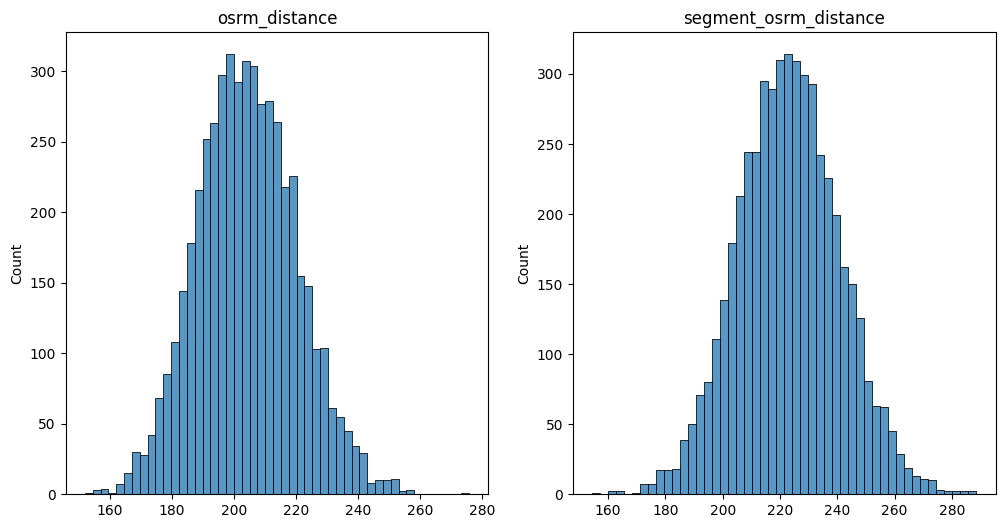

In [119]:
plt.figure(figsize = (12,6))
for i in range(2):
  plt.subplot(1,2,i+1)
  sns.histplot(subsetsamplemean[i])
  plt.title(subset[i])
plt.show()

* Even the Histogram shows that they are not following Normal Distribution
* Let's do QQ Plot also

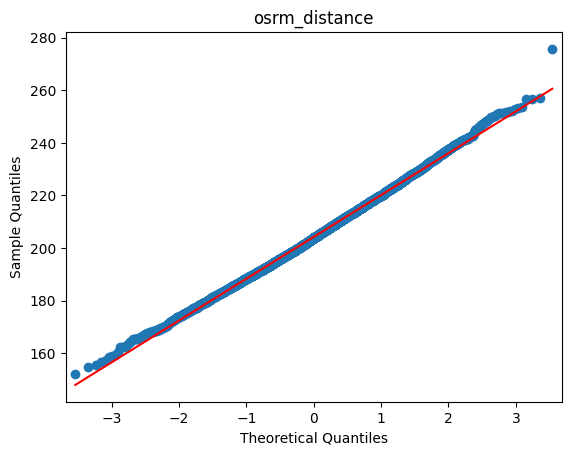

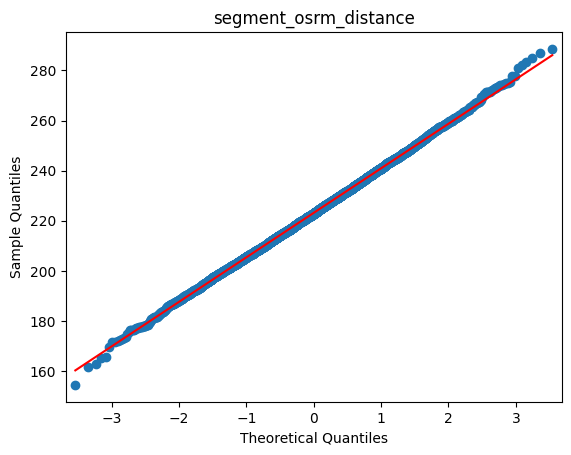

In [120]:
for i in range(2):
   qqplot( np.array(subsetsamplemean[i]) , line="s")
   plt.title(subset[i])
   plt.show()

* From Shapiro, Histogram & QQ plot--> we can conclude that both data sets sample means are not following Normal Distribution, slightly deviated
* Now we will do Levene test to check for equal Variances of datasets

In [121]:
# Ho: Variances are equal
# Ha: Variances are not equal
levene_stat, p_value = levene(data2[subset[0]],data2[subset[1]])
print(p_value)
if p_value < 0.05:
    print("Reject Ho")
    print("Variances are not equal")
else:
    print("Fail to reject Ho")
    print("Variances are equal")

0.00020976354422600578
Reject Ho
Variances are not equal


* Both Datasets do not have equal Variance
* T-Test Independent is valid on the assumptions that 1. Sample means of 2 data sets follow Normal Distribution & Datasets Have Equal Variances
* But both of them are not valid
* so we will **Non-Paramteric Independent sample T-test**

In [122]:
# subset = ["osrm_distance","segment_osrm_distance"]

#H0: mu1 >= mu2
#Ha : mu1 < mu2

kruskal_stat, p_value= mannwhitneyu(data2[subset[0]],data2[subset[1]],alternative = "less")
print(p_value)
if p_value < 0.05:
    print("Reject H0")
    print("One or more groups have different mean")
else:
    print("Fail to reject H0")
    print("All groups have same mean")

4.755626029197483e-07
Reject H0
One or more groups have different mean


* From Hypothesis Testing we can conclude that, **"osrm_distance" is less than "segment_osrm_distance" for a given trip_uuid**

## osrm_time and segment_osrm_time

In [123]:
subset = ["osrm_time","segment_osrm_time"]

In [124]:
subsetsamplemean = [[np.mean(data2[i].sample(500)) for k in range(5000)] for i in subset]

* let's check for Normal Distribution of both Data sets

In [125]:
# H0 : Data is Gaussian
# Ha : Data is not Gaussian
for i in range(2):
  test_stat, p_value = shapiro(subsetsamplemean[i])
  print(p_value)
  if p_value < 0.05:
       print("Reject H0")
       print(subset[i],"Data is Not Gaussian")
  else:
       print("Fail to reject H0")
       print(subset[i],"Data is Gaussian")
  print()

0.00081280228914693
Reject H0
osrm_time Data is Not Gaussian

1.6704287872926216e-06
Reject H0
segment_osrm_time Data is Not Gaussian



* Let us plot Histplot to check how data actually looks

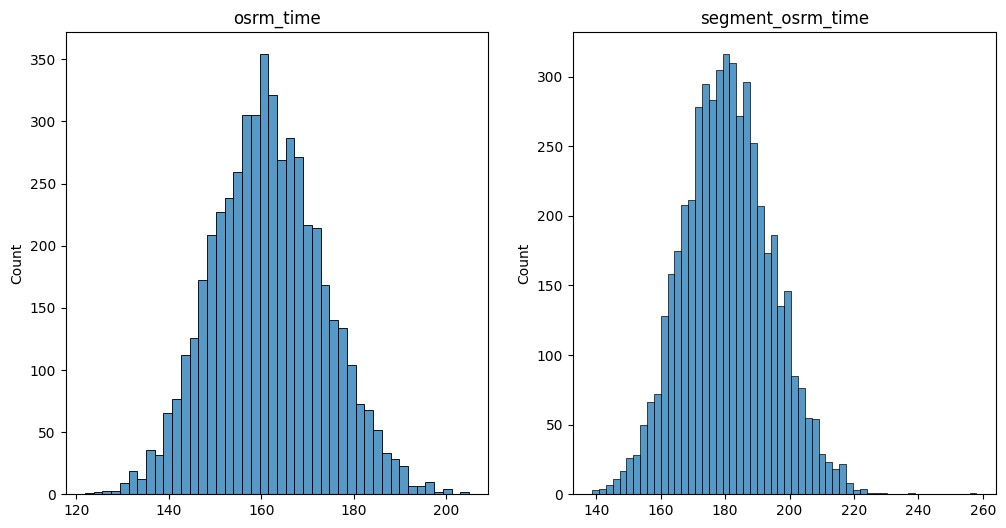

In [126]:
plt.figure(figsize = (12,6))
for i in range(2):
  plt.subplot(1,2,i+1)
  sns.histplot(subsetsamplemean[i])
  plt.title(subset[i])
plt.show()

* Even the Histogram shows that they are not following Normal Distribution
* Let's do QQ Plot also

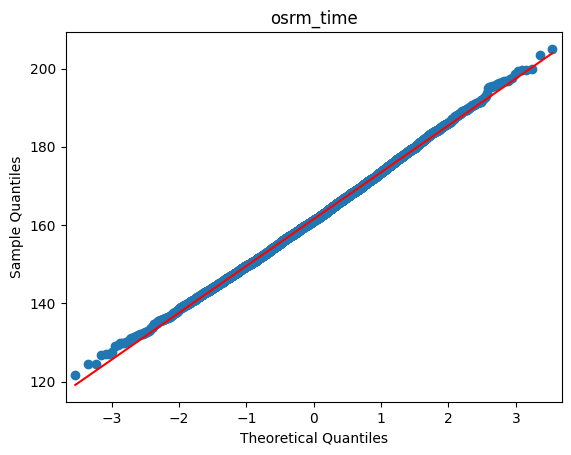

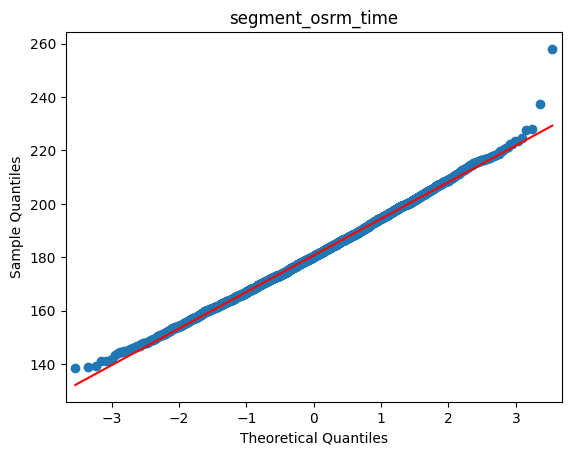

In [127]:
for i in range(2):
   qqplot( np.array(subsetsamplemean[i]) , line="s")
   plt.title(subset[i])
   plt.show()

* From Shapiro, Histogram & QQ plot--> we can conclude that both data sets sample means are not following Normal Distribution, slightly deviated
* Now we will do Levene test to check for equal Variances of datasets

In [128]:
# Ho: Variances are equal
# Ha: Variances are not equal
levene_stat, p_value = levene(data2[subset[0]],data2[subset[1]])
print(p_value)
if p_value < 0.05:
    print("Reject Ho")
    print("Variances are not equal")
else:
    print("Fail to reject Ho")
    print("Variances are equal")

8.349482669010088e-08
Reject Ho
Variances are not equal


* Both Datasets do not have equal Variance
* T-Test Independent is valid on the assumptions that 1. Sample means of 2 data sets follow Normal Distribution & Datasets Have Equal Variances
* But both of them are not valid
* so we will **Non-Paramteric Independent sample T-test**

In [129]:
# subset = ["osrm_time","segment_osrm_time"]

#H0: mu1 >= mu2
#Ha : mu1 < mu2

kruskal_stat, p_value= mannwhitneyu(data2[subset[0]],data2[subset[1]],alternative = "less")
print(p_value)
if p_value < 0.05:
    print("Reject H0")
    print("One or more groups have different mean")
else:
    print("Fail to reject H0")
    print("All groups have same mean")

1.1497685429874432e-08
Reject H0
One or more groups have different mean


* From Hypothesis Testing we can conclude that, **"osrm_time" is less than "segment_osrm_time" for a given trip_uuid**

## actual_distance_to_destination and osrm_distance

In [130]:
subset = ["actual_distance_to_destination","osrm_distance"]

In [131]:
subsetsamplemean = [[np.mean(data2[i].sample(500)) for k in range(5000)] for i in subset]

* let's check for Normal Distribution of both Data sets

In [132]:
# H0 : Data is Gaussian
# Ha : Data is not Gaussian
for i in range(2):
  test_stat, p_value = shapiro(subsetsamplemean[i])
  print(p_value)
  if p_value < 0.05:
       print("Reject H0")
       print(subset[i],"Data is Not Gaussian")
  else:
       print("Fail to reject H0")
       print(subset[i],"Data is Gaussian")
  print()

1.8086872159983614e-06
Reject H0
actual_distance_to_destination Data is Not Gaussian

2.4716477128094994e-05
Reject H0
osrm_distance Data is Not Gaussian



* Let us plot Histplot to check how data actually looks

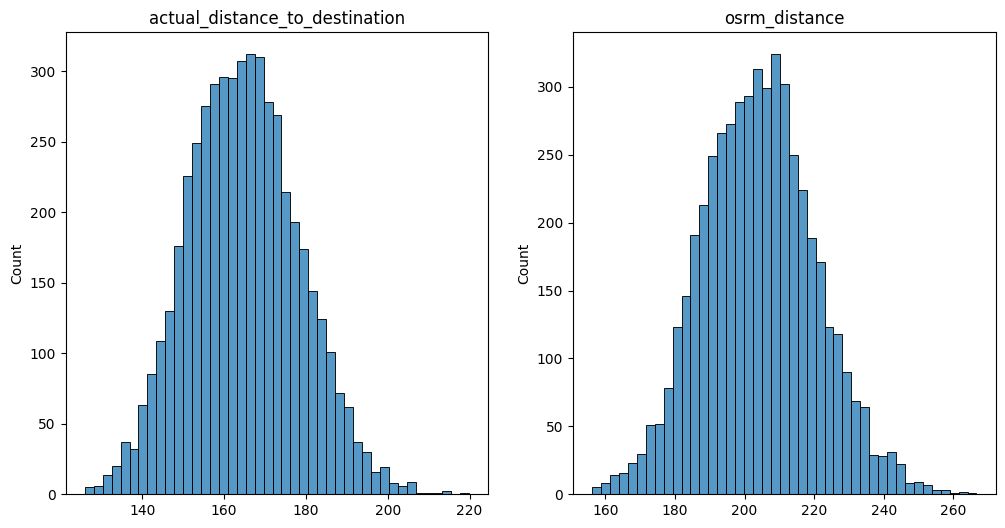

In [133]:
plt.figure(figsize = (12,6))
for i in range(2):
  plt.subplot(1,2,i+1)
  sns.histplot(subsetsamplemean[i])
  plt.title(subset[i])
plt.show()

* Even the Histogram shows that they are not following Normal Distribution
* Let's do QQ Plot also

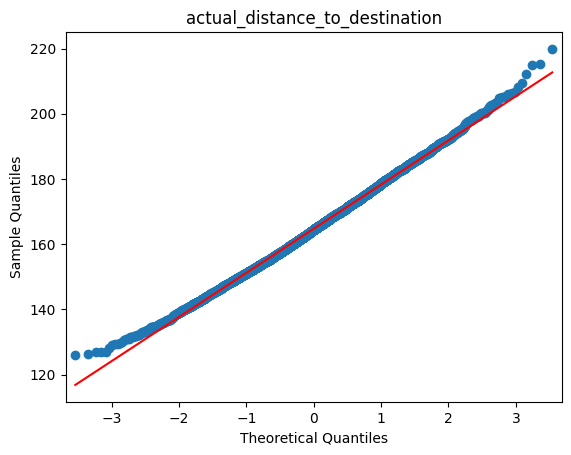

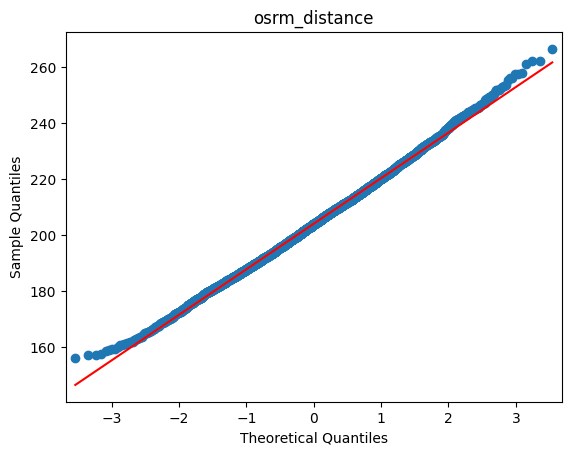

In [134]:
for i in range(2):
   qqplot( np.array(subsetsamplemean[i]) , line="s")
   plt.title(subset[i])
   plt.show()

* From Shapiro, Histogram & QQ plot--> we can conclude that both data sets sample means are not following Normal Distribution, slightly deviated
* Now we will do Levene test to check for equal Variances of datasets

In [135]:
# Ho: Variances are equal
# Ha: Variances are not equal
levene_stat, p_value = levene(data2[subset[0]],data2[subset[1]])
print(p_value)
if p_value < 0.05:
    print("Reject Ho")
    print("Variances are not equal")
else:
    print("Fail to reject Ho")
    print("Variances are equal")

1.5344941235406327e-17
Reject Ho
Variances are not equal


* Both Datasets do not have equal Variance
* T-Test Independent is valid on the assumptions that 1. Sample means of 2 data sets follow Normal Distribution & Datasets Have Equal Variances
* But both of them are not valid
* so we will **Non-Paramteric Independent sample T-test**

In [136]:
# subset = ["actual_distance_to_destination","osrm_distance"]

#H0: mu1 >= mu2
#Ha : mu1 < mu2

kruskal_stat, p_value= mannwhitneyu(data2[subset[0]],data2[subset[1]],alternative = "less")
print(p_value)
if p_value < 0.05:
    print("Reject H0")
    print("One or more groups have different mean")
else:
    print("Fail to reject H0")
    print("All groups have same mean")

3.612957871564052e-76
Reject H0
One or more groups have different mean


* From Hypothesis Testing we can conclude that, **"actual_distance_to_destination" is less than "osrm_distance" for a given trip_uuid**

# **Feature Engineering**

### Eliminate Reduntant features

In [137]:
data2.shape

(14817, 29)

In [138]:
data2.drop(columns = ["trip_creation_time","source_name","destination_name"], axis = 1,inplace= True)

In [139]:
data2.shape

(14817, 26)

## Encoding : Non-Numerical to Numerical

* We have to Convert all Non Numerical to Numerical Before feeding to Model
* we will use following to to convert all the Categorical data to Numerical
** "One-Hot Encoding" for Non Numerical features with 2 values [in Problem statemtent "One-Hot Encoding" explicity Requested, else we can be "label Encoder" also]
** "Target Encoder" for Non Numerical features with more than 2 values with **"actual_time"** as Target"

### Label Encoding

* Creating a Label Encoder Object

#### data

In [140]:
le=LabelEncoder()

In [141]:
data2["data"]=le.fit_transform(data2["data"])
data2["data"].value_counts()

1    10654
0     4163
Name: data, dtype: int64

1 --> Training Data
0 --> Test Data

### One-Hot Encoding

#### route_type

In [142]:
data2["route_type"].value_counts()

Carting    8908
FTL        5909
Name: route_type, dtype: int64

In [143]:
data2 = pd.get_dummies(data2, columns = ["route_type"])

In [144]:
data2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14817 entries, 0 to 14816
Data columns (total 27 columns):
 #   Column                          Non-Null Count  Dtype   
---  ------                          --------------  -----   
 0   trip_uuid                       14817 non-null  object  
 1   data                            14817 non-null  int64   
 2   route_schedule_uuid             14817 non-null  object  
 3   source_center                   14817 non-null  object  
 4   destination_center              14817 non-null  object  
 5   start_scan_to_end_scan          14817 non-null  float64 
 6   actual_distance_to_destination  14817 non-null  float64 
 7   actual_time                     14817 non-null  float64 
 8   osrm_time                       14817 non-null  float64 
 9   osrm_distance                   14817 non-null  float64 
 10  segment_actual_time             14817 non-null  float64 
 11  segment_osrm_time               14817 non-null  float64 
 12  segment_osrm_dista

* we can see "route_type" category columns has been One Hot Encoded --> it converted into 2 Numerical columns : route_type_Carting & route_type_FTL
* Now we will converts other Non-Numricl columns with >2 group using Target Encoder

### Target Encoding

* Creating as TargetEncoder Object

In [145]:
te=TargetEncoder()

#### source_center

In [146]:
data2["source_center"].value_counts()

IND000000ACB    948
IND421302AAG    811
IND562132AAA    731
IND560099AAB    426
IND160002AAC    370
               ... 
IND504215AAA      1
IND844101AAB      1
IND284403AAA      1
IND621212AAA      1
IND303338AAB      1
Name: source_center, Length: 868, dtype: int64

In [147]:
data2["source_center"]=te.fit_transform(data2["source_center"],data2["actual_time"])
data2["source_center"].value_counts()

754.231013    948
469.427867    811
553.675787    731
99.046948     426
638.697297    370
             ... 
339.820623      1
351.660494      1
364.931559      1
324.858149      1
344.894854      1
Name: source_center, Length: 789, dtype: int64

#### others

In [ ]:
data2.columns

Index(['trip_uuid', 'data', 'route_schedule_uuid', 'source_center',
       'destination_center', 'start_scan_to_end_scan',
       'actual_distance_to_destination', 'actual_time', 'osrm_time',
       'osrm_distance', 'segment_actual_time', 'segment_osrm_time',
       'segment_osrm_distance', 'od_total_time', 'trip_creation_hour',
       'trip_creation_day', 'trip_creation_week', 'trip_creation_month',
       'trip_creation_year', 'source_state', 'source_city', 'source_place',
       'destination_state', 'destination_city', 'destination_place',
       'route_type_Carting', 'route_type_FTL'],
      dtype='object')

In [148]:
nonnumerical = ['destination_center','trip_uuid','route_schedule_uuid','trip_creation_hour',
       'trip_creation_day', 'trip_creation_week', 'trip_creation_month',
       'trip_creation_year', 'source_state', 'source_city', 'source_place',
       'destination_state', 'destination_city', 'destination_place']

In [149]:
for i in nonnumerical:
  data2[i]=te.fit_transform(data2[i],data2["actual_time"])

In [150]:
for i in data2.columns:
  print(i,"-->",data2[i].dtype,"-->",data2[i].nunique())

trip_uuid --> float64 --> 1853
data --> int64 --> 2
route_schedule_uuid --> float64 --> 1443
source_center --> float64 --> 789
destination_center --> float64 --> 840
start_scan_to_end_scan --> float64 --> 2208
actual_distance_to_destination --> float64 --> 14801
actual_time --> float64 --> 1853
osrm_time --> float64 --> 817
osrm_distance --> float64 --> 14734
segment_actual_time --> float64 --> 1890
segment_osrm_time --> float64 --> 1242
segment_osrm_distance --> float64 --> 14754
od_total_time --> float64 --> 14817
trip_creation_hour --> float64 --> 24
trip_creation_day --> float64 --> 22
trip_creation_week --> float64 --> 4
trip_creation_month --> float64 --> 2
trip_creation_year --> float64 --> 1
source_state --> float64 --> 33
source_city --> float64 --> 613
source_place --> float64 --> 659
destination_state --> float64 --> 41
destination_city --> float64 --> 684
destination_place --> float64 --> 714
route_type_Carting --> uint8 --> 2
route_type_FTL --> uint8 --> 2


* All Feature have been converted to Numerical data type

## Scaling of Numerical Categories

* Before Scaling we will store the Row index for test and Tain data, so that we can separate data after Scaling

In [152]:
data2.shape

(14817, 27)

In [153]:
testtrain = data2["data"]
data2.drop(columns = ["data"],axis=1,inplace=True)

In [154]:
data2.shape

(14817, 26)

* From PCA Mathematical Derivation, we know that if Any Feature's Mean is "0", it will be easy to do Computation
* Also If Feature's Mean = 0, then Model Development will be good
* So we will do Standardization instead of Normalization

### Standardization

In [157]:
scaler = StandardScaler()

In [158]:
standardized = scaler.fit_transform(data2)

In [159]:
standardized

array([[ 2.14625072,  0.75265239,  0.92618362, ...,  1.46387707,
        -1.22781549,  1.22781549],
       [-0.38146143, -0.24588095, -0.29061509, ..., -0.20542008,
         0.81445462, -0.81445462],
       [ 5.32593091,  5.1735464 ,  0.79201088, ...,  0.78807576,
        -1.22781549,  1.22781549],
       ...,
       [-0.13385608, -0.39274303, -0.03958484, ...,  0.7209205 ,
         0.81445462, -0.81445462],
       [-0.16592008, -0.18628031, -0.45690199, ..., -0.42665845,
         0.81445462, -0.81445462],
       [-0.14632542, -0.13928955, -0.43218183, ..., -0.3540543 ,
        -1.22781549,  1.22781549]])

lets convert standardized data into our initial DataFrame Format

In [187]:
datafinal = pd.DataFrame(standardized,columns = data2.columns)

In [188]:
datafinal.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14817 entries, 0 to 14816
Data columns (total 26 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   trip_uuid                       14817 non-null  float64
 1   route_schedule_uuid             14817 non-null  float64
 2   source_center                   14817 non-null  float64
 3   destination_center              14817 non-null  float64
 4   start_scan_to_end_scan          14817 non-null  float64
 5   actual_distance_to_destination  14817 non-null  float64
 6   actual_time                     14817 non-null  float64
 7   osrm_time                       14817 non-null  float64
 8   osrm_distance                   14817 non-null  float64
 9   segment_actual_time             14817 non-null  float64
 10  segment_osrm_time               14817 non-null  float64
 11  segment_osrm_distance           14817 non-null  float64
 12  od_total_time                   

## Standardized Data

In [189]:
datafinal.shape

(14817, 26)

In [190]:
datafinal.head()

,trip_uuid,route_schedule_uuid,source_center,destination_center,start_scan_to_end_scan,actual_distance_to_destination,actual_time,osrm_time,osrm_distance,segment_actual_time,...,trip_creation_month,trip_creation_year,source_state,source_city,source_place,destination_state,destination_city,destination_place,route_type_Carting,route_type_FTL
0,2.146251,0.752652,0.926184,1.395621,2.623702,2.162092,2.146251,2.047585,2.124848,2.146791,...,0.370449,0.0,1.084445,0.487163,1.038697,1.099760,1.509164,1.463877,-1.227815,1.227815
1,-0.381461,-0.245881,-0.290615,-0.206382,-0.532593,-0.298944,-0.381461,-0.344144,-0.321920,-0.382742,...,0.370449,0.0,-0.661491,-0.254223,-0.315120,-0.635412,-0.187413,-0.205420,0.814455,-0.814455
2,5.325931,5.173546,0.792011,0.747063,5.165134,5.772935,5.325931,5.817598,5.804050,5.310954,...,0.370449,0.0,-0.661491,0.933378,0.889415,0.766495,0.781831,0.788076,-1.227815,1.227815
3,-0.531093,-0.562513,-1.408815,-1.132277,-0.654047,-0.482362,-0.531093,-0.539462,-0.498578,-0.530163,...,0.370449,0.0,-0.645420,-1.490880,0.054030,-0.917633,-1.364243,-1.170208,0.814455,-0.814455
4,-0.028757,-0.085846,-0.316435,-0.119761,0.282670,-0.121257,-0.028757,-0.163566,-0.155387,-0.024976,...,0.370449,0.0,-0.661491,-0.283372,-0.755174,-0.635412,-0.084897,-0.354054,-1.227815,1.227815


In [191]:
datafinal.describe()

,trip_uuid,route_schedule_uuid,source_center,destination_center,start_scan_to_end_scan,actual_distance_to_destination,actual_time,osrm_time,osrm_distance,segment_actual_time,...,trip_creation_month,trip_creation_year,source_state,source_city,source_place,destination_state,destination_city,destination_place,route_type_Carting,route_type_FTL
count,1.481700e+04,1.481700e+04,1.481700e+04,14817.000000,1.481700e+04,1.481700e+04,1.481700e+04,1.481700e+04,1.481700e+04,1.481700e+04,...,1.481700e+04,14817.0,1.481700e+04,1.481700e+04,1.481700e+04,1.481700e+04,1.481700e+04,1.481700e+04,1.481700e+04,1.481700e+04
mean,1.191671e-15,1.352319e-16,3.452728e-17,0.000000,3.260910e-17,-2.373751e-17,3.548638e-17,4.603638e-17,3.260910e-17,4.411820e-17,...,-1.657310e-15,0.0,4.757092e-16,-1.266000e-16,1.457819e-16,1.150909e-17,-2.512819e-16,7.672730e-18,4.028183e-17,1.246819e-17
std,1.000034e+00,1.000034e+00,1.000034e+00,1.000034,1.000034e+00,1.000034e+00,1.000034e+00,1.000034e+00,1.000034e+00,1.000034e+00,...,1.000034e+00,0.0,1.000034e+00,1.000034e+00,1.000034e+00,1.000034e+00,1.000034e+00,1.000034e+00,1.000034e+00,1.000034e+00
min,-6.201601e-01,-1.373608e+00,-1.605809e+00,-1.361388,-7.709467e-01,-5.091246e-01,-6.201601e-01,-5.726293e-01,-5.272157e-01,-6.200543e-01,...,-2.699428e+00,0.0,-2.173775e+00,-1.601270e+00,-1.778412e+00,-2.021607e+00,-1.407676e+00,-1.408943e+00,-1.227815e+00,-8.144546e-01
25%,-5.168428e-01,-4.508752e-01,-7.163032e-01,-0.843837,-5.796561e-01,-4.638208e-01,-5.168428e-01,-4.878685e-01,-4.685028e-01,-5.175785e-01,...,3.704488e-01,0.0,-6.614908e-01,-6.005740e-01,-7.194090e-01,-9.176329e-01,-8.226134e-01,-7.943877e-01,-1.227815e+00,-8.144546e-01
50%,-3.707734e-01,-2.348909e-01,-1.360075e-01,-0.186589,-3.807746e-01,-3.798696e-01,-3.707734e-01,-3.736257e-01,-3.745471e-01,-3.719551e-01,...,3.704488e-01,0.0,-3.639566e-01,-2.638064e-02,-3.791219e-02,-1.850890e-01,-8.467698e-02,-1.406023e-01,8.144546e-01,-8.144546e-01
75%,2.290126e-02,4.260768e-02,5.919698e-01,0.562946,1.612154e-01,3.450474e-04,2.290126e-02,2.438156e-02,1.115146e-02,2.356531e-02,...,3.704488e-01,0.0,9.810524e-01,5.366739e-01,4.989239e-01,9.333450e-01,6.226045e-01,5.962239e-01,8.144546e-01,1.227815e+00
max,1.052386e+01,7.588890e+00,4.223425e+00,3.512398,1.118472e+01,6.621482e+00,1.052386e+01,6.893692e+00,7.116244e+00,1.056418e+01,...,3.704488e-01,0.0,4.100426e+00,2.957775e+00,3.217637e+00,2.940055e+00,2.858012e+00,3.669570e+00,8.144546e-01,1.227815e+00


<Axes: >

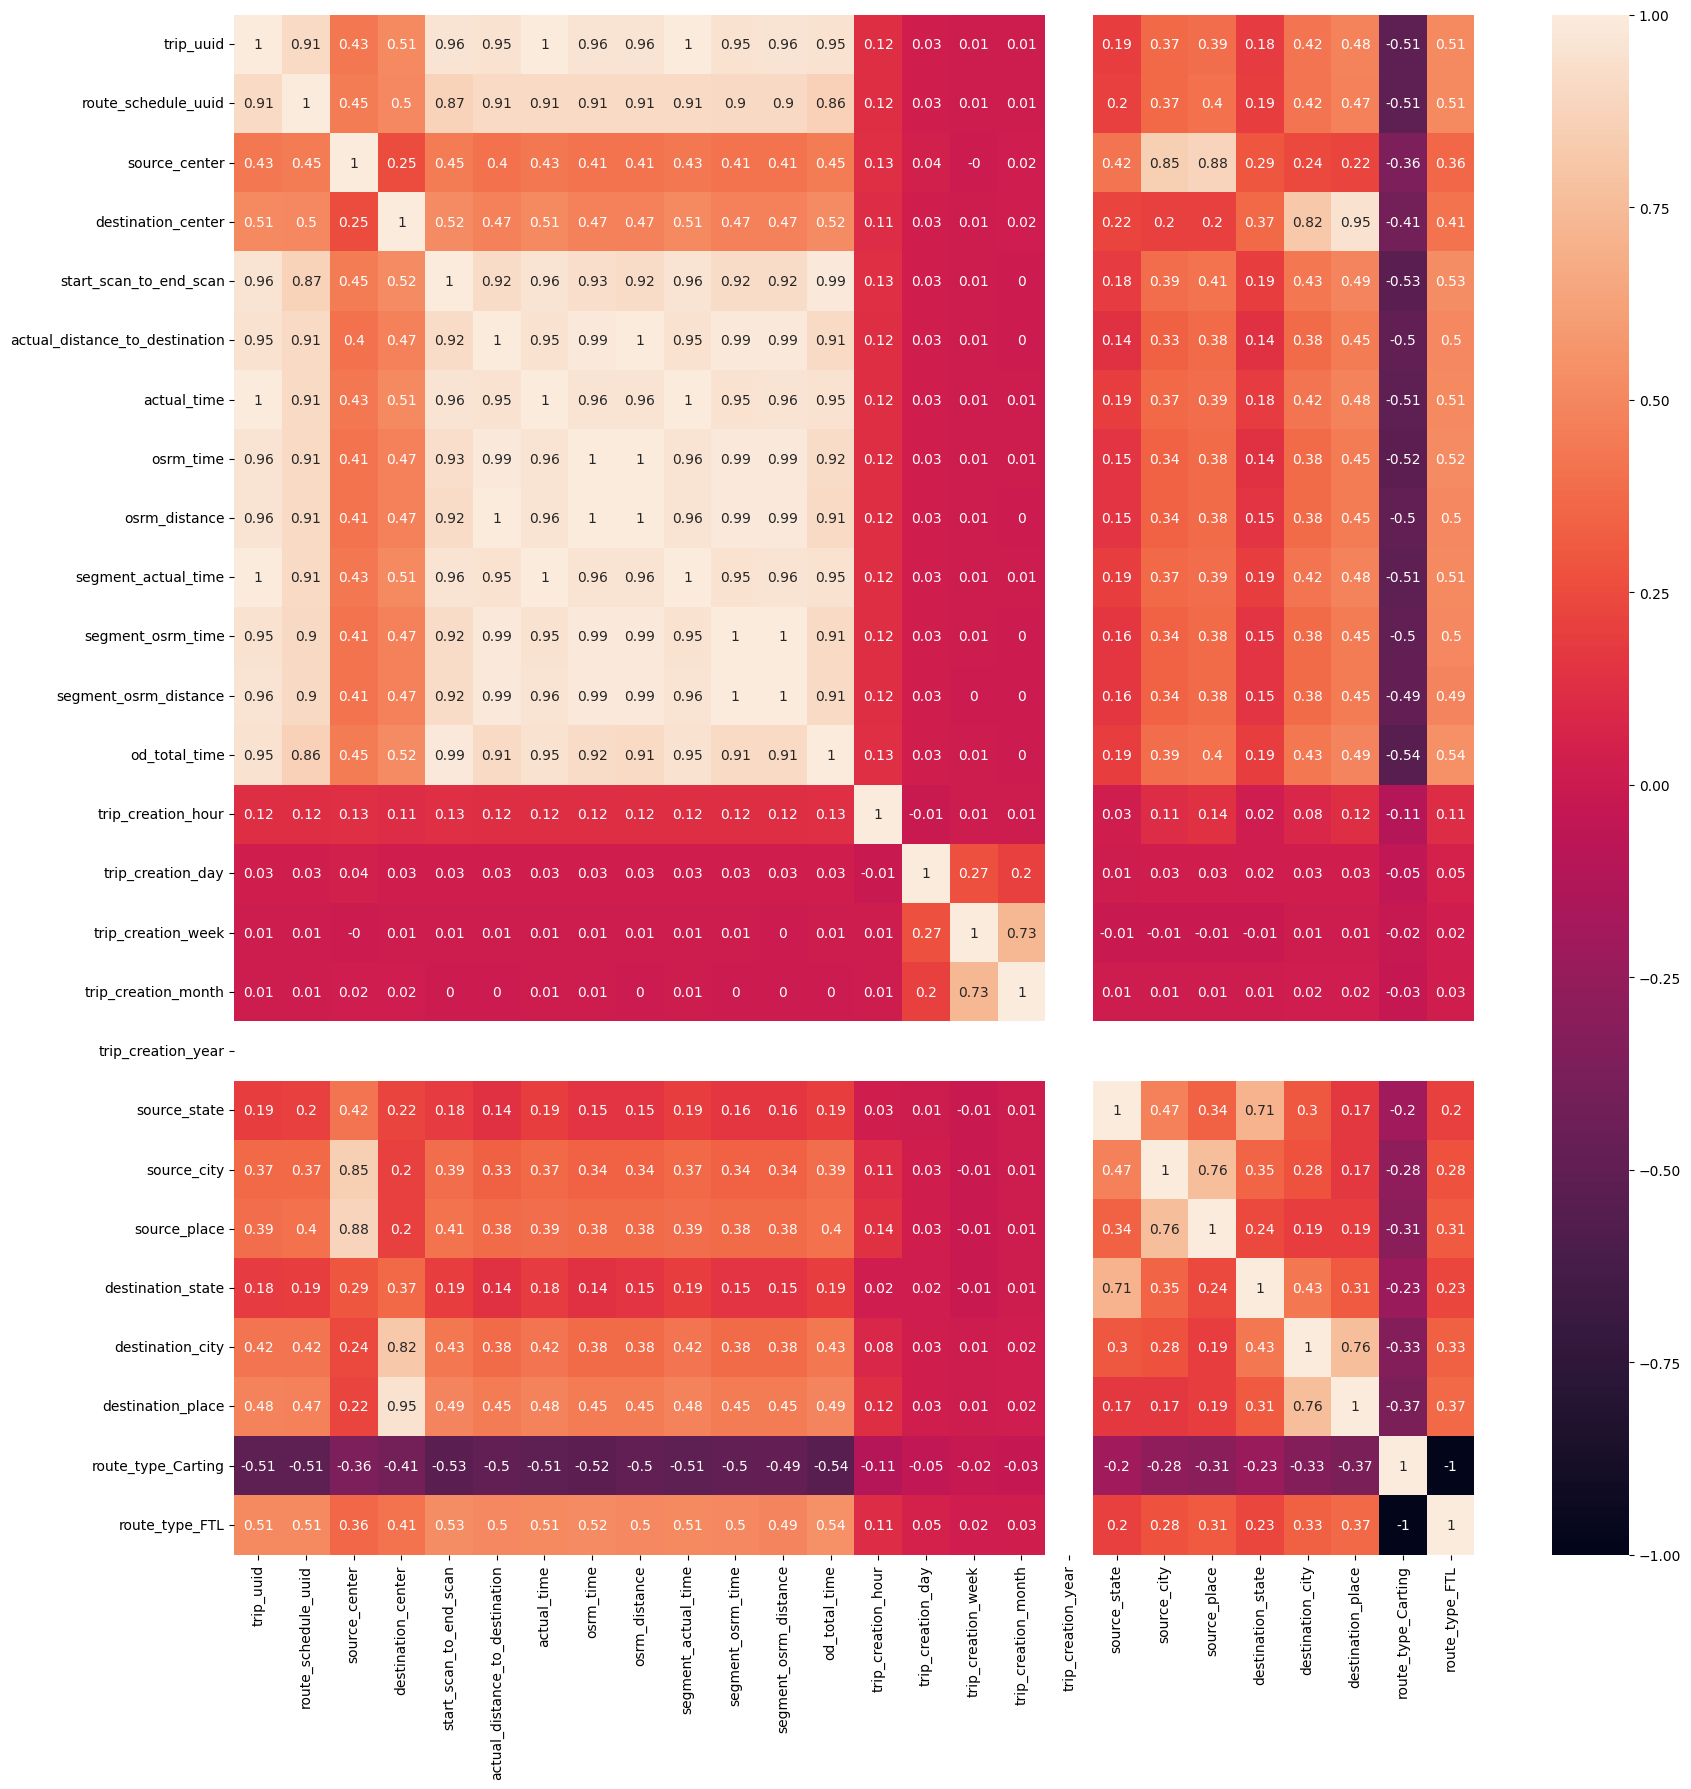

In [192]:
plt.figure(figsize = (20,20))
sns.heatmap(round(datafinal.corr(),2),annot=True)

* Actual_time for Delivery is very well dependent on Source & Destination - City & Place
* Actual_time for delivery is comparatively less dependent on Source & Destination State & Time of Booking[hour,day,week,month]

## Final data - Dividing Data for Training & Test

* we will use "testtrain" & divide data into X --> our Features
Y --> Desired Outcome [ Our desired outcome is "actual_time"]
* we will have 4 below datasets
** Xtrain
** Xtest
** ytrain
** ytest

In [193]:
y = data2["actual_time"]
X = datafinal.drop(columns = ["actual_time"],axis=1)

In [167]:
y.shape

(14817,)

In [194]:
X.shape

(14817, 25)

In [195]:
Xtrain = X.loc[testtrain == 1]

In [196]:
Xtrain.shape

(10654, 25)

In [197]:
Xtest = X.loc[testtrain == 0]

In [198]:
Xtest.shape

(4163, 25)

In [199]:
ytrain = y.loc[testtrain == 1]

In [200]:
ytrain.shape

(10654,)

In [201]:
ytest = y.loc[testtrain == 0]

In [202]:
ytest.shape

(4163,)

# **Bussiness Insights**

* The DataSet provided is between 2018-09-12 00:00:16.535741 & 2018-10-03 23:59:42.701692
* Training : Test Data Ratio use = 72:28
* 60% trips are of Cart Types, rest are of FTL type
* Trip creations are lowest in the Noon and Starts to increase and reaches peak in midnight
* More Number of Trip are created in the moiddle of the month and Number of trips are less at start and End of month
* There is not much effect of Week ina month for trip Creation
* Top 5 Source States:Maharastra,Karnataka,Harayana,Tamilnadu,Delhi
* Top 5 destination States: Maharastra,Karnataka,Harayana,Tamilnadu,Telangana
* Top5 Source Cities:Bengaluru,Gurgoan,Mumbai,Bhiwandi,Delhi
* Top5 Destination Cities: Bengaluru,Mumbai,Gurgoan,Hyderabad,Bhiwandi

* "od_total_time" is greater than "start_scan_to_end_scan" for a given trip_uuid
* "actual_time" is always greater than "osrm_time" for a given trip_uuid
* "actual_time" & "segment_actual_time" have approx same mean for a given trip_uuid
* "osrm_distance" is less than "segment_osrm_distance" for a given trip_uuid
* "osrm_time" is less than "segment_osrm_time" for a given trip_uuid
* "actual_distance_to_destination" is less than "osrm_distance" for a given trip_uuid

# **Recommendations**

* Major Traffic is found in Maharastra, Karnataka,Haryana --> Appropriate infrastructure & Manpower needs to be maintained to reduce logitics Delays
* Carting Type Trip from among manjor Cities (Bengaluru, Gurugaon,Mumbai,Hyderabad,Delhi,Bhiwandi) can be Converted to FTL by delhivery to further Optimize the Total trip Duration
* High Trip Creation goes on during night time, & in the middle of the month, so appropriate Resource to be maintained to reduce process bottle Necks
* Actual Trip Time is alwasy greater than Osrm predicted time, so Accordingly Buffer to be added , so that no false commitment at customer end
* Actual Distance_to_Destination is statistically lower than osrm distance, so correction might be needed for distance calculation so that price of trip can be optimised according & best value can be given to customer